# Coursework 1 - Supervised learning - Task 1

# Outline


- [Task 1](#task-1): Regression <a name="index-task-1"></a>
  - [(1.1)](#task-11) Random Forest <a name="index-task-11"></a>
    - [(1.1.1)](#task-111) <a name="index-task-111"></a>
    - [(1.1.2)](#task-112) <a name="index-task-112"></a>
    - [(1.1.3, BSc students only)](#task-113b) <a name="index-task-113b"></a>
    - [(1.1.3, MSc/4th-year students only)](#task-113m) <a name="index-task-113m"></a>
  - [(1.2)](#task-12) Multi-layer Perceptron <a name="index-task-12"></a>
    - [(1.2.1)](#task-121) <a name="index-task-121"></a>
    - [(1.2.2)](#task-122) <a name="index-task-122"></a>
    - [(1.2.3, BSc students only)](#task-123b) <a name="index-task-123b"></a>
    - [(1.2.3, MSc/4th-year students only)](#task-123m) <a name="index-task-123m"></a>

<a name="task-1"></a>

# Task 1: Regression [(index)](#index-task-1)

In [ ]:
# we first import packages and libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# We set a global configuration for matplotlib to obtain well-readable plots
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# fixing random generator for reproducibility
rng = np.random.default_rng(9001)

<a name="task-11"></a>

## (1.1) Random Forest [(index)](#index-task-11)

I first upload the datasets, printing the first rows to check them and  inspect their structure.

In [ ]:
PATH = ... # put your path to the datasets here

data_train = pd.read_csv(PATH + 'nanoelectrodes_capacitance_samples.csv')
data_test = pd.read_csv(PATH + 'nanoelectrodes_capacitance_test.csv')

data_train.head()

Mounted at /content/drive


,Surface_Area ($m^2/g$),Defect_Ratio,Doped_Nitrogen_Percentage,Doped_Oxygen_Percentage,Doped_Sulfur_Percentage,Current_Density ($A/g$),Capacitance ($\mu F / cm^2$),Electrolyte_Concentration $[M]$,H9_Factor ($mL/g$),T5_Factor ($mL/g$),Doped_Zinc_Percentage,Doped_Flourine_Percentage,Doped_Carbon_Percentage
0,96.78,1.30,0.933333,19.690000,0.843333,6.0,173.0,6.0,11.188890,33.753753,80.542095,46.933213,50.199105
1,531.90,1.28,7.700000,13.700000,8.300000,5.0,298.5,6.0,54.206536,25.721984,36.506123,44.773787,19.238604
2,438.70,1.27,5.030000,4.760000,3.710000,2.0,404.0,2.0,46.425494,11.422661,45.927300,59.097544,67.537988
3,149.32,1.02,1.240000,15.450000,3.030000,0.3,299.7,6.0,16.322920,9.179250,69.495872,35.124313,62.494312
4,1484.00,0.84,5.740000,6.993333,0.386667,5.0,250.0,1.0,152.864772,29.174519,61.365160,50.942724,77.980072


In [ ]:
data_test.head()

,Surface_Area ($m^2/g$),Defect_Ratio,Doped_Nitrogen_Percentage,Doped_Oxygen_Percentage,Doped_Sulfur_Percentage,Current_Density ($A/g$),Capacitance ($\mu F / cm^2$),Electrolyte_Concentration $[M]$,H9_Factor ($mL/g$),T5_Factor ($mL/g$),Doped_Zinc_Percentage,Doped_Flourine_Percentage,Doped_Carbon_Percentage
0,444.50,0.84,2.51,4.76,3.71,10.0,137.50,6.0,49.609432,51.225638,46.902466,25.685810,45.407250
1,196.80,1.02,2.50,19.42,0.20,0.5,173.90,6.0,22.008342,5.978067,77.697696,43.395016,56.839706
2,1122.50,0.85,4.20,5.70,1.30,1.0,228.13,6.0,115.085236,7.235982,54.830009,41.491648,72.580806
3,39.05,1.02,4.16,9.39,2.21,1.0,280.00,6.0,4.309532,6.812445,39.595893,33.487503,58.428443
4,370.40,1.32,4.80,7.76,2.01,1.0,346.00,1.0,38.785107,7.970446,47.852171,45.612992,84.529863


I now create a training and test set consisting of X (the data features used as predictors) and y (the target outcome to predict, in this case the capacitance).

In [ ]:
target_name = 'Capacitance ($\mu F / cm^2$)'
feature_names = sorted(set(data_train.columns) - {target_name})

X_train = data_train.loc[:, feature_names].values
y_train = data_train.loc[:, target_name].values

X_test = data_test.loc[:, feature_names].values
y_test = data_test.loc[:, target_name].values

<a name="task-111"></a>

### (1.1.1) [(index)](#index-task-111)

In this section I implement the decision tree. With few adaptations, I can turn the decision tree classifier from the notebook into a model for regression, i.e., to predict a continuous outcome $y \in \mathbb{R}$.

There are two components in the decision tree classifier that one needs to replace for obtain a decision tree regressor:

1. The splitting step: in the decision tree classifier, we rely on an information theoretic measure (e.g., the GINI-index) as a cost function to decide the optimal column *j* and splitting value *s*. For the regressor version, one needs a loss function suited for continuous outcomes. One uses the following loss function, called the *Residual Sum of Squares* (RSS), that, for a given split into ($R_1,R_2$) reads:
$$RSS(\boldsymbol y; j, s) = \sum_{\boldsymbol x^{(i)} \in R_1(j, s)} (y^{(i)}- \bar{y}_{R_1})^2 + \sum_{\boldsymbol x^{(i)} \in R_2(j, s)} (y^{(i)}- \bar{y}_{R_2})^2$$
where $\overline{y}_{R_{\alpha}}$ is the average of the outcome variable in $R_{\alpha}$. The optimal column and splitting value are then found as:
$$\min_{j,s} RSS(\boldsymbol y; j, s)$$

We will need to implement five new functions:

  - `rss_loss`: to compute the RSS loss for the outcomes corresponding to a certain region.
  - `rss_split_value`: adaption from `gini_split_value` to call `rss_loss`.
  - `rss_split`: adaption from `gini_split` to call `rss_split_value`.
  - `build_tree_rss`: adaptation from `build_tree` to call `rss_split`.
  - `train_rss`: adaptation from `train` to call `build_tree_rss`.

2. Prediction step: instead of majority voting, we implement averaging over the outcome variables in the particular region where the new sample lies with a new function that I call `aggregate_continuous`.

In the next cell I define all these new functions. I also adapt the `split_samples` function to the case where features are only numerical.

In [ ]:
def split_samples(X, y, sample_weights, column, value):
    """
    Return the split of data whose column-th feature is less than value, with `column` numerical

    Arguments:
        X: training features, of shape (rss_split_rf(N, p).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        column: the column of the feature for splitting.
        value: splitting threshold  the samples
    Returns:
        tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
    """
    left_mask = (X[:, column] < value)

    # Using the binary masks `left_mask`, we split X, y, and sample_weights.
    X_l, y_l, w_l = X[left_mask, :], y[left_mask], sample_weights[left_mask]
    X_r, y_r, w_r = X[~left_mask, :], y[~left_mask], sample_weights[~left_mask]

    return (X_l, y_l, w_l), (X_r, y_r, w_r)

def rss_loss(y, sample_weights):
    """
    Calculate the RSS loss for outcomes.
    Arguments:
        y: vector of training outcomes, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the RSS-loss for y.
    """
    # Using numpy.average, this line computes the weighted average of outcomes.
    y_mean = np.average(y, weights=sample_weights)

    rss_vec = sample_weights * (y - y_mean)**2

    return rss_vec.sum()


def rss_split_value(X, y, sample_weights, column):
    """
    Calculate the RSS based on `column` with the splitting value
    that minimises the RSS-loss.
    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        column: the column of the feature for calculating. 0 <= column < p
    Returns:
        (float, float): the minimum RSS and the corresponding splitting value.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    min_rss, threshold = np.inf, None

    # split the values of i-th feature and calculate the cost
    for value in unique_vals:
        (_, y_l, w_l), (_, y_r, w_r) = split_samples(X, y, sample_weights,
                                                     column, value)

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        new_cost = rss_loss(y_l, w_l) + rss_loss(y_r, w_r)
        if new_cost < min_rss:
              min_rss, threshold = new_cost, value

    return min_rss, threshold


def rss_split(X, y, sample_weights):
    """
    Choose the best feature to split according to RSS cost function.
    Args:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (int, float): the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """

    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_rss = np.inf
    split_column = None
    split_val = np.nan

    for column in range(X.shape[1]):
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
        current_rss, current_split_val = rss_split_value(X, y, sample_weights, column)  # call rss_split_value to determine j and s


        if current_rss < min_rss:
            # Keep track of:

            # 1. the current minimum RSS value,
            min_rss = current_rss

            # 2. corresponding column,
            split_column = column

            # 3. corresponding split threshold.
            split_val = current_split_val

    return split_column, split_val


def aggregate_continuous(y, sample_weights):
    """
    Return the weighted average outcome.
    Args:
        y: vector of training outcomes, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the average outcome
    """
    return np.average(y, weights=sample_weights)

I can plug in these functions into the functions to build the regressor decision tree (that I call `build_tree_rss`) and to train it (`train_rss`).

In [ ]:
def build_tree_rss(X, y, sample_weights, feature_names, depth,  max_depth=10, min_samples_leaf=10):
    """Build the regressor decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training outcomes, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'average_outcome': For leaf nodes, this stores the average outcome. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
        Example:
            mytree = {
                'feature_name': 'petal length (cm)',
                'feature_index': 2,
                'value': 3.0,
                'categorical': False,
                'average_outcome': None,
                'left': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'average_outcome': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
                'right': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'average_outcome': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
            }
    """

    # include a clause for the cases where depth is exceeded, or X is too small
    if depth>=max_depth or len(X)<=min_samples_leaf:
        return {'average_outcome': aggregate_continuous(y, sample_weights)}

    split_index, split_val = rss_split(X, y, sample_weights)

    # If no valid split at this node, use aggregate outcomes
    if split_index is None:
        return {'average_outcome': aggregate_continuous(y, sample_weights)}


    # Split samples (X, y, sample_weights) given column, split-value
    (X_l, y_l, w_l), (X_r, y_r, w_r) = split_samples(X, y, sample_weights, split_index, split_val)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'average_outcome': None,
        'left': build_tree_rss(X_l, y_l, w_l, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rss(X_r, y_r, w_r, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

def train_rss(X, y, feature_names, sample_weights=None, max_depth=10, min_samples_leaf=10):
    """
    Build the decision tree according to the training data.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training outcomes, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    return build_tree_rss(X, y, sample_weights, feature_names,
                          depth=1, max_depth=max_depth,
                          min_samples_leaf=min_samples_leaf)

I use the functions defined so far to evaluate the trained regressor decision tree on new data, defining the functions `regress_rss` and `predict_rss`.

In [ ]:
def regress_rss(tree, x):
    """
    Regress a single sample with the fitted decision tree.
    Args:
        x: ((pd.Dataframe) a single sample features, of shape (p,).
    Returns:
        (float): predicted testing sample outcome.
    """

    if tree['average_outcome'] is not None:
        return tree['average_outcome']

    else:
        if x[tree['feature_index']] < tree['value']:
            return regress_rss(tree['left'], x)
        else:
            return regress_rss(tree['right'], x)


def predict_rss(tree, X):
    """
    Predict regression results for X.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample outcomes, of shape (N,).
    """

    if len(X.shape) == 1:
        return regress_rss(tree, X)
    else:
        return np.array([regress_rss(tree, x) for x in X])

Finally, I need the functions to estimate the $R^2$ score and the Mean Squared Error (MSE) on test data.

In [ ]:
def r_squared(y, y_hat):
    """
    Compute R-squared score given true outcomes and predicted outcomes.
    Args:
        y: true outcomes array, of shape (N,)
        y_hat: predicted outcomes array, of shape (N,)
    Returns:
        (float): R-squared score
    """
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)


def tree_score_r2(tree, X_test, y_test):
    """
    Compute R-squared score for predicted test outcomes against y_test.
    Args:
        tree: fitted regression tree.
        X_test: test data features array, of shape (N, p).
        y_test: test data outcomes array, of shape (N,).
    Returns:
        (float): R-squared score
    """

    y_pred = predict_rss(tree, X_test)

    return r_squared(y_test, y_pred)


def tree_mse(tree, X_test, y_test):
    """
    Compute MSE for predicted test outcomes against y_test.
    Args:
        tree: fitted regression tree.
        X_test: test data features array, of shape (N, p).
        y_test: test data outcomes array, of shape (N,).
    Returns:
        (float): MSE.
    """

    y_pred = predict_rss(tree, X_test)
    return np.mean((y_pred - y_test)**2)

I can now train a regressor decision tree on the training data and I evalute its performance both on the training and test data computing the $R^2$ score and the MSE.

In [ ]:
tree = train_rss(X_train, y_train,feature_names=feature_names, max_depth=10, min_samples_leaf=10)

print("The Mean Squared Error of the decision tree on the training set is:", tree_mse(tree, X_train, y_train))
print("The Mean Squared Error of the decision tree on the test set is:", tree_mse(tree, X_test, y_test))

print("The R^2 score of the decision tree on the training set is:", tree_score_r2(tree, X_train, y_train))
print("The R^2 score of the decision tree on the test set is:", tree_score_r2(tree, X_test, y_test))

The Mean Squared Error of the decision tree on the training set is: 1654.4051506951573
The Mean Squared Error of the decision tree on the test set is: 3466.219721900526
The R^2 score of the decision tree on the training set is: 0.7503640060081044
The R^2 score of the decision tree on the test set is: 0.47498192494468083


To assess the generalisation performance of my regressor decision tree, I look at the MSE and $R^2$ scores and compare their values between training and test set.

The MSE on the test set is roughly 2 times higher that of the training set ($\frac{3466}{1654} \sim 2 $), relatedly the $R^2$ score of the test set is roughly 1.6 times lower than that of the training set ($\frac{0.75}{0.48} \sim 1.6$). This means that the decision tree fits well the training data, but does not generalise well to unseen data.

It is known in general that decision trees have the tendency to overfit. Optimising some hyperparameters, like `min_samples_leaf` and `max_depth` might lead to better generalisation performance of the decision tree. Even more, switching to ensemble methods and random forests can improve it substantially, as is done in the next sections.

<a name="task-112"></a>

### (1.1.2) [(index)](#index-task-112)

In this section I perform bagging and feature bagging, that is, steps in the construction of decision trees to re-sample at random from the training data points and to sample at random a subset of features at each split, respectively. This leads me to the implementation of a random forest.

In bagging, the idea is to re-sample with replacement $B$ datasets of size $N' \leq N$ from the training set (which has size $N$), to then train a decision tree for each of the $B$ datasets ($N' = N$ in this case). $B$ is a hyperparameter that I will optimise by 5-fold cross validation. For feature bagging, the rule of thumb is to take at random a sample of $\frac{p}{3}$ features, where $p$ is the original number of features ($p=12$ in this case).

I first modify the functions previously defined to incorporate bagging (in the function `train_rf`) and feature bagging (in the function `rss_split_rf`). In the function `train_rf`, I also save the indices of Out-Of-Bag (OOB) samples for each tree, which will be useful in Task 1.1.3.

In [ ]:
def rss_split_rf(n_features, X, y, sample_weights):
    """
    Choose the best feature to split according to the RSS cost function, with a random feature subset resampling step.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (int, float): the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """

    # The added random sampling step.
    columns = rng.choice(list(range(X.shape[1])), n_features, replace=False)

    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_rss = np.inf
    split_column = None
    split_val = np.nan

    for column in columns:
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
        current_rss, current_split_val = rss_split_value(X, y, sample_weights,column)  # call rss_split_value to determine j and s


        if current_rss < min_rss:
            # Keep track with:

            # 1. the current minimum RSS value,
            min_rss = current_rss

            # 2. corresponding column,
            split_column = column

            # 3. corresponding split threshold.
            split_val = current_split_val

    return split_column, split_val


def build_tree_rss_rf(n_features, X, y, sample_weights, feature_names, depth, max_depth, min_samples_leaf):
    """Builds the regression decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'average_outcome': For leaf nodes, this stores the average outcome. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
        Example:
            mytree = {
                'feature_name': 'petal length (cm)',
                'feature_index': 2,
                'value': 3.0,
                'categorical': False,
                'average_outcome': None,
                'left': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'average_outcome': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
                'right': {
                    'feature_name': str,
                    'feature_index': int,
                    'value': float,
                    'categorical': bool,
                    'average_outcome': None,
                    'left': {..etc.},
                    'right': {..etc.}
                }
            }
    """
    # include a clause for the cases where is depth exceeded or X is too small
    if depth>=max_depth or len(X)<=min_samples_leaf:
        return {'average_outcome': aggregate_continuous(y, sample_weights)}

    split_index, split_val = rss_split_rf(n_features, X, y, sample_weights)

    # If no valid split at this node, use aggregate outcomes.
    if split_index is None:
        return {'average_outcome': aggregate_continuous(y, sample_weights)}


    # Split samples (X, y, sample_weights) given column, split-value, and categorical flag.
    (X_l, y_l, w_l), (X_r, y_r, w_r) = split_samples(X, y, sample_weights,
                                                     split_index, split_val)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'average_outcome': None,
        'left': build_tree_rss_rf(n_features, X_l, y_l, w_l, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rss_rf(n_features, X_r, y_r, w_r, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

def train_rf(X, y,  feature_names,
             max_depth, min_samples_leaf,
             n_features, B, sample_weights=None):
    """
    Resample B datasets from the training data and build a decision tree for each of them.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training targets, of shape (N,).
        B: number of decision trees.
        sample_weights: weights for each samples, of shape (N,).
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        sample = rng.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]

        oob_idx = np.array(list(sorted(set(training_indices) - set(sample)))) # identify indices of OOB samples

        tree = build_tree_rss_rf(n_features, X_sample,
                                 y_sample, w_sample,
                                 feature_names, depth=1,
                                 max_depth=max_depth,
                                 min_samples_leaf=min_samples_leaf)

        tree['oob'] = oob_idx # store the indices of OOB samples as part of the tree


        trees.append(tree)

    return trees

I now define the functions to make predictions with a trained random forest and to evaluate its performance via the $R^2$ score and MSE.

In [ ]:
def predict_rf(rf, X):
    """
    Predict random forest's regression results for X.
    Args:
        rf: A trained random forest through train_rf function.
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample outcomes, of shape (N,).
    """

    if len(X.shape) == 1:
        return np.mean([predict_rss(tree, X) for tree in rf])
    else:
        return np.array([np.mean([predict_rss(tree, x) for tree in rf]) for x in X])

def rf_r2_score(rf, X_test, y_test):
    """Wrapper function to return R^2 score of the random forest."""
    y_pred = predict_rf(rf, X_test)
    return r_squared(y_test, y_pred)

def rf_mse(rf, X_test, y_test):
    """Wrapper function to return MSE of the random forest."""
    y_pred = predict_rf(rf, X_test)
    return np.mean((y_test - y_pred)**2)

Now I implement a 5-fold cross-validation to search for an optimal B (without feature bagging), appropriately modifying the function `cross_validation_score` and starting with the range 1-50.

In [ ]:
# Create a list of five index arrays, each correspond to one of the five folds.
folds_indices = np.array_split(np.arange(len(y_train)), 5)

def cross_validation_score(X_train, y_train, folds, feature_names, max_depth, min_samples_leaf, n_features, B, sample_weights=None):
  """function to evaluate and aggregate the chosen metric of performance (score, here the MSE) across folds for the random forest"""

  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]

    X_val_i = X_train[val_indexes, :]
    y_val_i = y_train[val_indexes]

    #Train the RF and make predictions on the validation set
    RF_i = train_rf(X_train_i, y_train_i, feature_names, max_depth, min_samples_leaf, n_features, B, sample_weights)
    prediction_i = predict_rf(RF_i, X_val_i)

    #Compute MSE score of the validation fold
    MSE_i = np.mean((prediction_i - y_val_i)**2, keepdims=True)
    scores.append(np.squeeze(MSE_i))

  # Return the average score
  return sum(scores) / len(scores)

In [ ]:
from tqdm import tqdm

#Search for optimal B for the random forest (feature bagging leads n_features = 12/3 = 4)

dn=2
B_scores_rf = []

for B in tqdm(range(1,51, dn)):

    B_scores_rf.append(cross_validation_score(X_train, y_train, folds_indices, feature_names, 10, 10, 4, B))

print(B_scores_rf)

100%|██████████| 25/25 [22:18<00:00, 53.54s/it]

[6994.113178384912, 4195.427592677069, 4077.9977429899773, 3996.4737222178364, 3956.1436140956603, 3759.826624737143, 3582.8346492047253, 3712.2277556636022, 3737.434065788825, 3488.3584802791243, 3635.6719131689206, 3576.480851072248, 3607.9625722568185, 3672.5414085273624, 3538.264588772928, 3468.880810168851, 3679.1406665419586, 3479.0114391354464, 3597.6018411714745, 3578.8162825962195, 3399.0620916829357, 3523.9322420855206, 3566.8423029130513, 3452.4154792730938, 3536.968606544956]


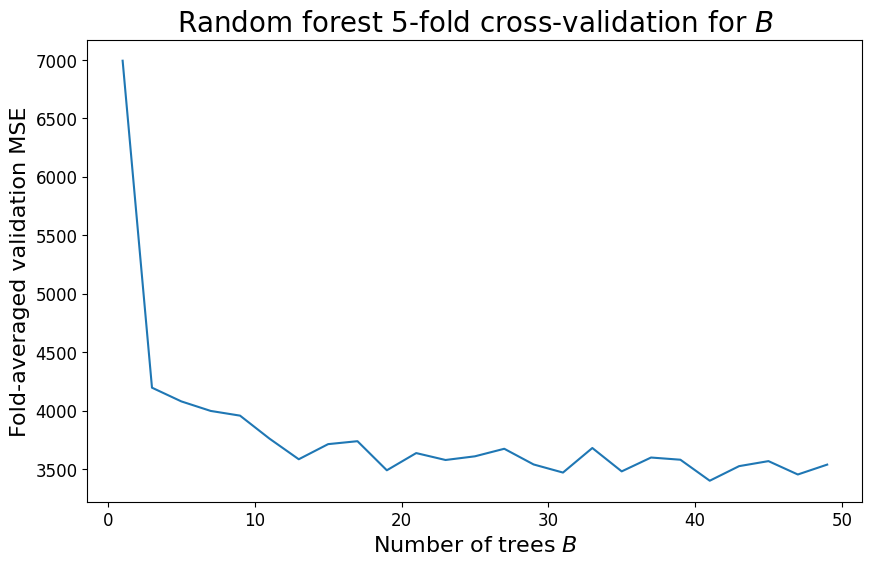

In [ ]:
#Plot the random forest cross-validation scores as a function of B
fig, ax = plt.subplots(figsize=(10,6)) # We make plot larger
plt.plot(np.arange(1,51, dn),B_scores_rf)
plt.xlabel(r'Number of trees $B$')
plt.ylabel(r'Fold-averaged validation MSE')
plt.title(r"Random forest 5-fold cross-validation for $B$")
plt.show()

The plot displays some convergence in the fold-averaged validation MSE as the number of trees $B$ increases, in particular with no substantial improvement above $\sim 20$. I set as optimal $B=20$, as it's roughly the minimal value after which we do not see any improvement. Next I train and evaluate the performance of the random forest with this $B$, and I repeat these steps for an ensemble of $B$ trees. I can use for both the `train_rf` function, passing in the former case 4 as the `n_features` argument, in the later 12.

In [ ]:
optimalB = 20
optimalB_rf_model = train_rf(X_train, y_train, feature_names,10,10,4,optimalB)

print(f"The Mean Squared Error of a random forest with {optimalB} decision trees on the training set is:", rf_mse(optimalB_rf_model, X_train, y_train))
print(f"The Mean Squared Error of a random forest with {optimalB} decision trees on the test set is:", rf_mse(optimalB_rf_model, X_test, y_test))
print(f"The R^2 score of an ensemble of a random forest with {optimalB} decision trees on the training set is:", rf_r2_score(optimalB_rf_model, X_train, y_train))
print(f"The R^2 score of an ensemble of a random forest with {optimalB} decision trees on the test set is:", rf_r2_score(optimalB_rf_model, X_test, y_test))

The Mean Squared Error of a random forest with 20 decision trees on the training set is: 1428.6949255182865
The Mean Squared Error of a random forest with 20 decision trees on the test set is: 3523.516011645159
The R^2 score of an ensemble of a random forest with 20 decision trees on the training set is: 0.784421803998208
The R^2 score of an ensemble of a random forest with 20 decision trees on the test set is: 0.4663034249755429


In [ ]:
optimalB_bagging_model = train_rf(X_train, y_train, feature_names,10,10,12,optimalB)

print(f"The Mean Squared Error of an ensemble of {optimalB} decision trees on the training set is:", rf_mse(optimalB_bagging_model, X_train, y_train))
print(f"The Mean Squared Error of an ensemble of {optimalB} decision trees on the test set is:", rf_mse(optimalB_bagging_model, X_test, y_test))
print(f"The R^2 score of an ensemble of {optimalB} decision trees on the training set is:", rf_r2_score(optimalB_bagging_model, X_train, y_train))
print(f"The R^2 score of an ensemble of {optimalB} decision trees on the test set is:", rf_r2_score(optimalB_bagging_model, X_test, y_test))

The Mean Squared Error of an ensemble of 20 decision trees on the training set is: 1255.0215051196553
The Mean Squared Error of an ensemble of 20 decision trees on the test set is: 3236.9719731651708
The R^2 score of an ensemble of 20 decision trees on the training set is: 0.810627680420297
The R^2 score of an ensemble of 20 decision trees on the test set is: 0.5097054051070431


Finally I build a table to compare these metrics to the ones for a single decision tree.

In [ ]:
table =pd.DataFrame([
    ('R^2 score', 'Decision Tree',  tree_score_r2(tree, X_train, y_train),  tree_score_r2(tree, X_test, y_test)),
    ('MSE', 'Decision Tree', tree_mse(tree, X_train, y_train),  tree_mse(tree, X_test, y_test)),

    ('R^2 score', 'Ensembles of Trees',  rf_r2_score(optimalB_bagging_model, X_train, y_train), rf_r2_score(optimalB_bagging_model, X_test, y_test)),
    ('MSE', 'Ensembles of Trees', rf_mse(optimalB_bagging_model, X_train, y_train), rf_mse(optimalB_bagging_model, X_test, y_test)),

    ('R^2 score', 'Random Forest',  rf_r2_score(optimalB_rf_model, X_train, y_train), rf_r2_score(optimalB_rf_model, X_test, y_test)),
    ('MSE', 'Random Forest',  rf_mse(optimalB_rf_model, X_train, y_train), rf_mse(optimalB_rf_model, X_test, y_test)),
], columns=['Metric', 'Model', 'On training set', 'On test set'])

table

,Metric,Model,On training set,On test set
0,R^2 score,Decision Tree,0.750364,0.474982
1,MSE,Decision Tree,1654.405151,3466.219722
2,R^2 score,Ensembles of Trees,0.810628,0.509705
3,MSE,Ensembles of Trees,1255.021505,3236.971973
4,R^2 score,Random Forest,0.784422,0.466303
5,MSE,Random Forest,1428.694926,3523.516012


From these results above, one sees that Random Forests and the Ensemble of Trees perform very similarly to the decision tree when looking at the MSE and $R^2$ score on training and test sets. Only the ensemble of trees shows some gain in generalisability compared to the tree alone, with a change in $R^2$ score of the test set from 0.47 to 0.51. The lack of great improvement when we add feature bagging might suggest: 1. that we might need to further optimise the random forest architecture, because the optimal $B$ was chosen without feature bagging; 2. that the bagged trees are not extremely correlated, which could suggest there are not a dominant features that tend to be used for prediction in every tree inducing correlations among trees.

<a name="task-113b"></a>

### (1.1.3, BSc students only) [(index)](#index-task-113b)

In this section, I search for optimal values of `max_depth` and `min_samples_leaf`, keeping $B$ fixed, for the random forest. I first create a grid varying jointly `max_depth` and `min_samples_leaf`, choosing an interval that covers the range 5-25 for the former and 1-10 for the latter, then I scan through them via 5-fold cross-validation using the MSE as metric.


In [ ]:
# Generate the grid of hyperparameters.

rf_min_samples_range = np.arange(1, 12, 2)
rf_max_depth_range = np.arange(5, 26, 4)

rf_min_samples_grid, rf_max_depth_grid = np.meshgrid(rf_min_samples_range, rf_max_depth_range)

# Initialise the cross-validation MSE grid matrix to NaNs.
rf_mse_grid_cv = np.ones_like(rf_min_samples_grid) * np.nan

# loop through `max_depth` and `min_samples_leaf` jointly
for i in tqdm(range(rf_mse_grid_cv.shape[0])):
    for j in tqdm(range(rf_mse_grid_cv.shape[1]), leave=False):

          min_samples_leaf = rf_min_samples_grid[i, j]
          max_depth = rf_max_depth_grid[i, j]

          mse = cross_validation_score(X_train, y_train, folds_indices, feature_names, max_depth, min_samples_leaf, 4, optimalB, sample_weights=None)

          rf_mse_grid_cv[i, j] = mse


100%|██████████| 6/6 [27:55<00:00, 279.24s/it]


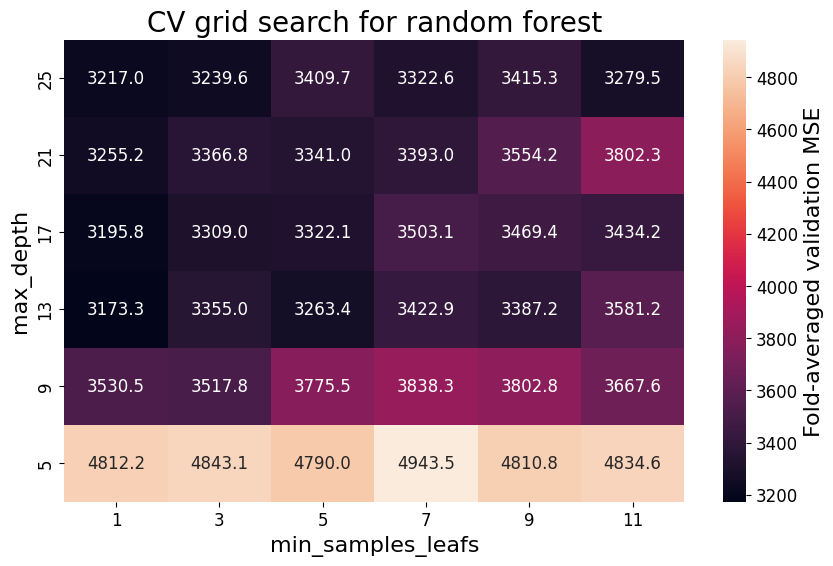

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.heatmap(rf_mse_grid_cv, annot=True, fmt=".1f", cbar_kws={'label': 'Fold-averaged validation MSE'})
ax.invert_yaxis()

ax.set_yticklabels([str(x) for x in rf_max_depth_range])
ax.set_xticklabels([str(x) for x in rf_min_samples_range])

ax.set_ylabel('max_depth')
ax.set_xlabel('min_samples_leafs')

ax.set_title('CV grid search for random forest')
plt.show(ax)

The plot of the fold-averaged validation MSE shows that it stops improving substantially for `max_depth` bigger than 13 and `min_samples_leaf` smaller than 5, confirming that the interval chosen are sufficient to determine optimal hyperparameters. I set the hyperparameters to these values beyond which the performance saturates (`max_depth`=13 and `min_samples_leaf`=5), being aware than higher values of `max_depth` and lower values of `min_samples_leaf` might be more prone to overfitting.

In [ ]:
optimal_min_samples_leaf = 5
optimal_max_depth = 13

Finally I re-train the random forest with these optimal hyper-parameters, I evaluate its performance and I add it to the previous table, labelling it as `Optimised Random Forest', to make a full comparison of models.

In [ ]:
# fit the random forest with training data
final_rf = train_rf(X_train, y_train, feature_names=feature_names,
              B=optimalB, n_features=4,
              max_depth=optimal_max_depth,
              min_samples_leaf=optimal_min_samples_leaf)

print(f"The Mean Squared Error of a random forest with optimal hyperparameters on the training set is:", rf_mse(final_rf, X_train, y_train))
print(f"The Mean Squared Error of a random forest with optimal hyperparameters on the test set is:", rf_mse(final_rf, X_test, y_test))
print(f"The R^2 score of an ensemble of a random forest with optimal hyperparameters on the training set is:", rf_r2_score(final_rf, X_train, y_train))
print(f"The R^2 score of an ensemble of a random forest with optimal hyperparameters on the test set is:", rf_r2_score(final_rf, X_test, y_test))

The Mean Squared Error of a random forest with optimal hyperparameters on the training set is: 788.5973224999167
The Mean Squared Error of a random forest with optimal hyperparameters on the test set is: 2788.821480806847
The R^2 score of an ensemble of a random forest with optimal hyperparameters on the training set is: 0.8810072149624925
The R^2 score of an ensemble of a random forest with optimal hyperparameters on the test set is: 0.5775854380277642


In [ ]:
table =pd.DataFrame([
    ('R^2 score', 'Decision Tree',  tree_score_r2(tree, X_train, y_train),  tree_score_r2(tree, X_test, y_test)),
    ('MSE', 'Decision Tree', tree_mse(tree, X_train, y_train),  tree_mse(tree, X_test, y_test)),

    ('R^2 score', 'Ensembles of Trees',  rf_r2_score(optimalB_bagging_model, X_train, y_train), rf_r2_score(optimalB_bagging_model, X_test, y_test)),
    ('MSE', 'Ensembles of Trees', rf_mse(optimalB_bagging_model, X_train, y_train), rf_mse(optimalB_bagging_model, X_test, y_test)),

    ('R^2 score', 'Random Forest',  rf_r2_score(optimalB_rf_model, X_train, y_train), rf_r2_score(optimalB_rf_model, X_test, y_test)),
    ('MSE', 'Random Forest',  rf_mse(optimalB_rf_model, X_train, y_train), rf_mse(optimalB_rf_model, X_test, y_test)),

     ('R^2 score', 'Optimised Random Forest',  rf_r2_score(final_rf, X_train, y_train), rf_r2_score(final_rf, X_test, y_test)),
    ('MSE', 'Optimised Random Forest',  rf_mse(final_rf, X_train, y_train), rf_mse(final_rf, X_test, y_test)),
], columns=['Metric', 'Model', 'On training set', 'On test set'])

table

,Metric,Model,On training set,On test set
0,R^2 score,Decision Tree,0.750364,0.474982
1,MSE,Decision Tree,1654.405151,3466.219722
2,R^2 score,Ensembles of Trees,0.810628,0.509705
3,MSE,Ensembles of Trees,1255.021505,3236.971973
4,R^2 score,Random Forest,0.784422,0.466303
5,MSE,Random Forest,1428.694926,3523.516012
6,R^2 score,Optimised Random Forest,0.881007,0.577585
7,MSE,Optimised Random Forest,788.597322,2788.821481


Optimising additional hyper-parameters of the random forest has the effect of improving its performance on the test set (e.g., $R^2$ score improves to 0.58 from the value of 0.47 of the previous random forest). This is expected, because the optimal hyperparameters have been chosen based on the out-of-sample performance. We see an improvement also on the training set (e.g., $R^2$ score improves to 0.88 from the value of 0.78 of the previous random forest), signalling that out-of-sample performance here benefits from additional accuracy at fitting the training set.

I now use the Out-Of-Bag (OOB) samples, i.e. the samples that were not picked at each bagging instance, to estimate the variable importance of each feature based on the MSE as performance metric.

For each tree, I consider the OOB samples and I evaluate the tree's MSE on these samples ($MSE^0$). Next for each feature $j$, I make a permutation of column $j$ of the OOB samples and I compute the performance gap induced by this randomisation, which is given by $|MSE_{j\,\text{permuted}}^0 - MSE^0|$. The final variable importance is given by the average of the performance gap over trees and is expressed as a percentage of the importance of the most important feature.

In [ ]:
def rf_oob_feature_importance(rf, feature_names, X_train, y_train):

    """
    Function to estimate importance factors from OOB samples
    Args:
        rf: trained random forest.
        feature_names: list of feature names, of length p.
        X: training data, of shape (N, p).
        y: training outcomes, of shape (N,).
    Returns:
        (np.array): variable importance per feature expressed as percentage of the most important feature, of shape (p,).
    """

    performance_gap = np.zeros((len(rf), len(feature_names))) # matrix of size (B, p)

    for b, tree in enumerate(rf):
        oob_idx = tree['oob']  # oob indices stored during the training.

        X_oob = X_train[oob_idx, :]
        y_oob = y_train[oob_idx]

        # metric for tree b, before permutation.
        metric_oob_0 = tree_mse(tree, X_oob, y_oob)

        # Permute the feature columns across the OOB examples.
        X_oob_permuted = rng.permuted(X_oob, axis=0) # matrix of size (# OOB samples, p)
        for i, name in enumerate(feature_names):
            X_oob_perm_i = X_oob.copy()

            X_oob_perm_i[:, i] = X_oob_permuted[:, i] # with column i permuted.

            # compute performance metric after permuting column i.
            metric_oob_perm_i = tree_mse(tree, X_oob_perm_i, y_oob)

            # For tree b, and column i, record the performance gap.
            performance_gap[b, i] = abs(metric_oob_perm_i - metric_oob_0)

    variable_importance = performance_gap.mean(axis=0) # average the performance gap across trees.

    # return importance factors as percentage of the most important feature
    return 100 * variable_importance / variable_importance.max()

Here I compute and plot the variable importance.

                                 Variable Importance (% of the max)
Electrolyte_Concentration $[M]$                           10.221757
Doped_Flourine_Percentage                                 13.995771
Doped_Zinc_Percentage                                     15.517305
Doped_Carbon_Percentage                                   17.273104
Current_Density ($A/g$)                                   31.871962
Doped_Nitrogen_Percentage                                 33.474992
Doped_Sulfur_Percentage                                   36.850580
T5_Factor ($mL/g$)                                        38.877071
Defect_Ratio                                              61.484515
H9_Factor ($mL/g$)                                        79.965122
Doped_Oxygen_Percentage                                   96.003554
Surface_Area ($m^2/g$)                                   100.000000


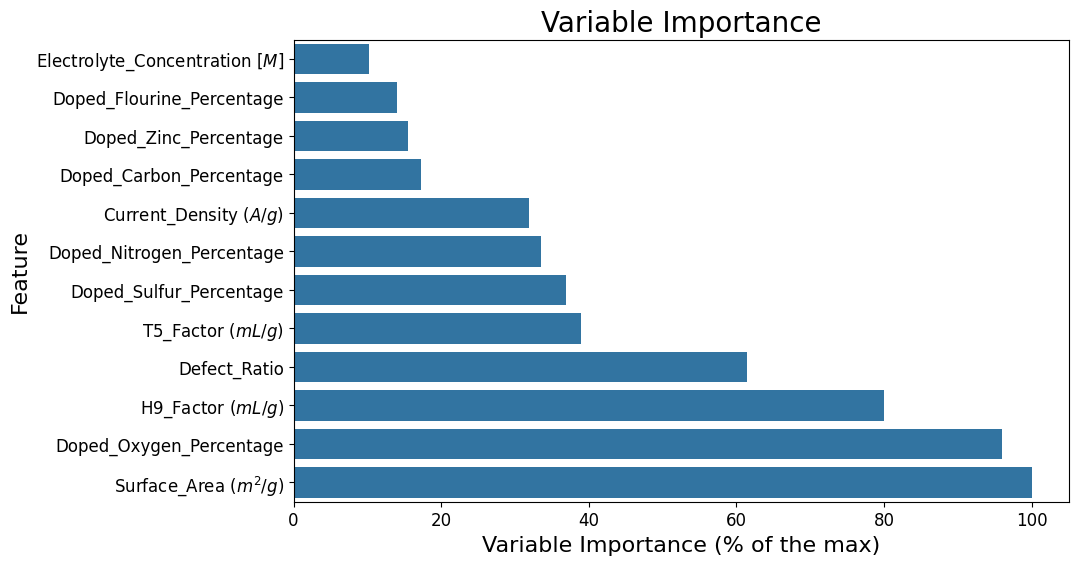

In [ ]:
feature_importance = rf_oob_feature_importance(final_rf, feature_names, X_train, y_train)


feature_importance_df = pd.DataFrame(feature_importance,
                                     index=feature_names,
                                     columns=['Variable Importance (% of the max)'])

feature_importance_df = feature_importance_df.sort_values('Variable Importance (% of the max)')
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Variable Importance (% of the max)'], y=feature_importance_df.index)
plt.xlabel('Variable Importance (% of the max)')
plt.ylabel('Feature')
plt.title('Variable Importance')
ax.set_xlim(0, 110)
plt.show()

The plot of variable importance shows that `Surface Area` is the most important feature to predict the outcome. It does make sense for the surface area to have the highest importance, as the quantity of charge depends on the surface. Another feature with almost the same importance ($96%$) is `Doped Oxygen Percentage`. Also `H9 Factor` and `Defect Ratio` contribute substantially to the prediction (with an importance $\sim 80\%$ and $\sim 60\%$ of the most important feature, respectively). Other features (for instance `Electrolyte Concentration [M]` and `Doped Fluorine Percentage`) have importance lower than $15\%$, meaning that they are much less relevant to the prediction performance, hence to the determination of capacitance.  

<a name="task-113m"></a>

### (1.1.3, MSc/4th-year students only) [(index)](#index-task-113m)

In this section I implement a Gradient Boosted Decision Tree (GBDT) regression model, which is built as follows.

Gradient Boosting is an iterative procedure aimed at reducing the error of prediction of a model called strong model. At each iteration $t$ the prediction by the strong model $S_t$ is updated according to:
$$
S_{t+1} = S_{t} - \nu w_t
$$
where $\nu$ is a shrinkage hyperparameter (controlling the rate of update) and $w_t$ is the prediction of a "weak" decision tree, trained at each iteration to predict the signed error of prediction by the strong model at that iteration.

Below I define the functions  code to respectively train a GBDT and use it to make predictions on a test set.

In [ ]:
def train_gbdt(X, y, n_weak_learners, lr, max_depth, min_samples_leaf, feature_names, sample_weights=None, n_features=None):
    """
    Trains a Gradient Boosted Decision Tree (GBDT) using decision tree weak learners.
    Args:
        X: training data, of shape (N, p).
        y: training outcomes, of shape (N,).
        n_weak_learners: number of weak models.
        lr: shrinkage hyperparameter.
        max_depth: maximum depth of decision trees.
        min_samples_leaf: minimum number of samples per leaf in the decision trees.
        feature_names: names of features in the decision tree.
        sample_weights: weights for each samples, of shape (N,).
        n_features: number of features in the decision tree.
    Returns:
        (tuple): contains:
            - gbdt (list): list of trained weak decision trees.
            - lr (float): shrinkage hyperparameter to use during training.
    """

    # if not provided, take all the features
    if n_features is None:
        n_features = X.shape[1]

    gbdt = []
    strong_predictions = np.zeros_like(y) # Initially, the strong model is empty.

    for _ in range(n_weak_learners):
        # Error of the strong model
        error = (strong_predictions - y)

        # build as weak model a decision tree whose regression outcome is the error of the strong model
        weak_tree = train_rss(X, error, feature_names, sample_weights, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

        gbdt.append(weak_tree)

        # make predictions with the weak model
        weak_predictions = predict_rss(weak_tree, X)

        # update the strong model's predictions
        strong_predictions -= lr * weak_predictions

    return (gbdt, lr)


def predict_gbdt(gbdt, X):
    """
    Performs predictions with an inputted GBDT model on a given test set
    Args:
        gbdt: trained GBDT model, tuple of (list, float) - the set of weak trees and the shrinkage parameter.
        X: test set, of shape (N, p).
    Returns:
        (list): GBDT predictions for each test set data point, of shape (N,).
    """
    # unpack the tuple to obtain the set of trees and the shrinkage factor using in training
    gbdt, lr = gbdt
    strong_predictions = np.zeros(len(X))

    for tree in gbdt:
        strong_predictions -= lr * predict_rss(tree, X)

    return strong_predictions


def gbdt_r2_score(gbdt, X_test, y_test):
    """Wrapper function to return R^2 score of GBDT."""

    y_pred = predict_gbdt(gbdt, X_test)
    return r_squared(y_test, y_pred)


def gbdt_mse(gbdt, X_test, y_test):
    """Wrapper function to return MSE of GBDT."""

    y_pred = predict_gbdt(gbdt, X_test)
    return np.mean((y_test - y_pred)**2)

In [ ]:
# I set the number of weak models and the learning rate
n_learners = 50
learning_rate = 0.4

Next I adapt the `cross_validation_score` function to GBDT to perform 5-fold cross-validation to optimise the `max_depth` and `min_samples_leaf` of the weak learners.



In [ ]:
def cross_validation_score_gbdt(X_train, y_train, folds, n_weak_learners, lr, max_depth, min_samples_leaf, feature_names, sample_weights=None, n_features=None):
  """function to evaluate and aggregate the chosen metric of performance (score, here the MSE) across folds for a GBDT"""

  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]

    X_val_i = X_train[val_indexes, :]
    y_val_i = y_train[val_indexes]

    #Train the GBDT and make predictions on the validation set
    GBDT_i = train_gbdt(X_train_i, y_train_i, n_weak_learners, lr, max_depth, min_samples_leaf, feature_names, sample_weights, n_features)
    prediction_i = predict_gbdt(GBDT_i, X_val_i)

    #Compute MSE score
    MSE_i = np.mean((prediction_i - y_val_i)**2, keepdims=True)
    scores.append(np.squeeze(MSE_i))

  # Return the average score
  return sum(scores) / len(scores)

Next I generate the grid of hyperparameters, setting some reasonable range to scan - `max_depth` up to 25 and `min_samples_leaf` in the interval 1-10. Some preliminary test I carried out highlighted the need to scan also small values (<=5) of `max_depth` for GBDT.

In [ ]:
gbdt_min_samples_range = np.arange(1, 12, 2)
gbdt_max_depth_range = np.array([2, 3, 4, 5, 10, 15, 20, 25])

gbdt_min_samples_grid, gbdt_max_depth_grid = np.meshgrid(gbdt_min_samples_range, gbdt_max_depth_range)

# Initialise the cross-validation MSE grid matrix to NaNs.
gbdt_mse_grid_cv = np.ones_like(gbdt_min_samples_grid) * np.nan

# loop through `max_depth` and `min_samples_leaf` jointly
for i in tqdm(range(gbdt_mse_grid_cv.shape[0])):
    for j in tqdm(range(gbdt_mse_grid_cv.shape[1]), leave=False):

          min_samples_leaf = gbdt_min_samples_grid[i, j]
          max_depth = gbdt_max_depth_grid[i, j]

          mse = cross_validation_score_gbdt(X_train, y_train, folds_indices, n_learners, learning_rate, max_depth=max_depth, min_samples_leaf=min_samples_leaf, feature_names=feature_names, sample_weights=None, n_features=None)

          gbdt_mse_grid_cv[i, j] = mse

100%|██████████| 8/8 [5:58:45<00:00, 2690.66s/it]


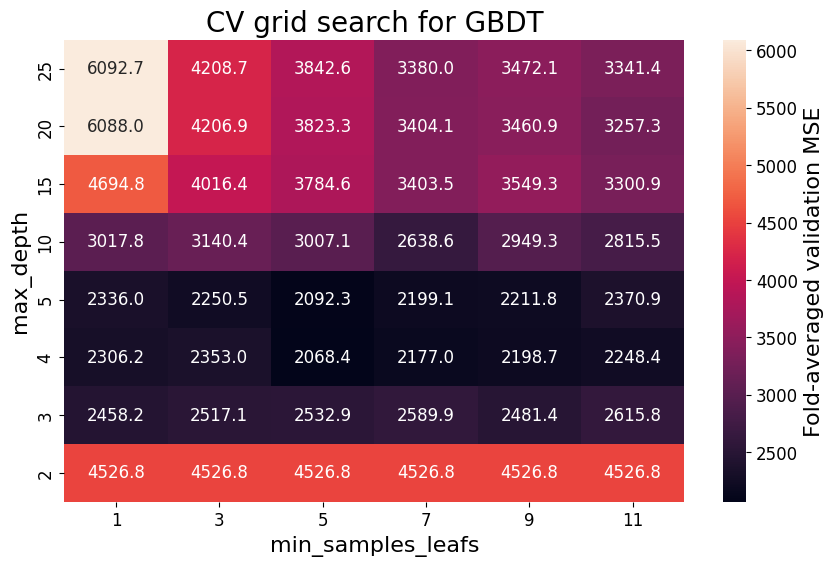

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.heatmap(gbdt_mse_grid_cv, annot=True, fmt=".1f", cbar_kws={'label': 'Fold-averaged validation MSE'})
ax.invert_yaxis()

#Set tick labels
ax.set_yticklabels([str(x) for x in gbdt_max_depth_grid[:,0]])
ax.set_xticklabels([str(x) for x in gbdt_min_samples_grid[0,:]])

ax.set_ylabel('max_depth')
ax.set_xlabel('min_samples_leafs')

ax.set_title('CV grid search for GBDT')
plt.show(ax)

The plot of the fold-averaged validation MSE shows that there is a clear minimum in the loss for `max_depth`= 4 and at `min_samples_leaf` = 5, confirming that the intervals chosen are sufficient to determine the optimal hyperparameters. So I set the hyperparameters to these optimal values and I evaluate the GBDT performance on the test set.

In [ ]:
# Find and print the optimal hyper-parameters
best_hps = np.unravel_index(np.argmin(gbdt_mse_grid_cv), gbdt_mse_grid_cv.shape)

optimal_min_samples_leaf = gbdt_min_samples_grid[best_hps]
optimal_max_depth = gbdt_max_depth_grid[best_hps]

print(f"The optimal value of `min_samples_leaf` is ", optimal_min_samples_leaf)
print(f"The optimal value of `max_depth` is ", optimal_max_depth)

The optimal value of `min_samples_leaf` is  5
The optimal value of `max_depth` is  4


In [ ]:
final_gbdt = train_gbdt(X_train, y_train, n_weak_learners=n_learners, lr=learning_rate,
                  max_depth=optimal_max_depth,  min_samples_leaf=optimal_min_samples_leaf,
                  feature_names=feature_names,
                  n_features=12)

print(f"The Mean Squared Error of the optimised GBDT on the training set is:", gbdt_mse(final_gbdt, X_train, y_train))
print(f"The Mean Squared Error of the optimised GBDT on the test set is:", gbdt_mse(final_gbdt, X_test, y_test))

print(f"The R^2 score of the optimised GBDT on the training set is:", gbdt_r2_score(final_gbdt, X_train, y_train))
print(f"The R^2 score of the optimised GBDT on the test set is:", gbdt_r2_score(final_gbdt, X_test, y_test))

The Mean Squared Error of the optimised GBDT on the training set is: 312.1686691357392
The Mean Squared Error of the optimised GBDT on the test set is: 2390.719380696781
The R^2 score of the optimised GBDT on the training set is: 0.9528963410322538
The R^2 score of the optimised GBDT on the test set is: 0.6378847886300008


In [ ]:
table =pd.DataFrame([
    ('R^2 score', 'Decision Tree',  tree_score_r2(tree, X_train, y_train),  tree_score_r2(tree, X_test, y_test)),
    ('MSE', 'Decision Tree', tree_mse(tree, X_train, y_train),  tree_mse(tree, X_test, y_test)),

    ('R^2 score', 'Ensembles of Trees',  rf_r2_score(optimalB_bagging_model, X_train, y_train), rf_r2_score(optimalB_bagging_model, X_test, y_test)),
    ('MSE', 'Ensembles of Trees', rf_mse(optimalB_bagging_model, X_train, y_train), rf_mse(optimalB_bagging_model, X_test, y_test)),

    ('R^2 score', 'Random Forest',  rf_r2_score(optimalB_rf_model, X_train, y_train), rf_r2_score(optimalB_rf_model, X_test, y_test)),
    ('MSE', 'Random Forest',  rf_mse(optimalB_rf_model, X_train, y_train), rf_mse(optimalB_rf_model, X_test, y_test)),

     ('R^2 score', 'Optimised GBDT', gbdt_r2_score(final_gbdt, X_train, y_train), gbdt_r2_score(final_gbdt, X_test, y_test)),
    ('MSE', 'Optimised GBDT', gbdt_mse(final_gbdt, X_train, y_train), gbdt_mse(final_gbdt, X_test, y_test)),
], columns=['Metric', 'Model', 'On training set', 'On test set'])

table

,Metric,Model,On training set,On test set
0,R^2 score,Decision Tree,0.750364,0.474982
1,MSE,Decision Tree,1654.405151,3466.219722
2,R^2 score,Ensembles of Trees,0.810628,0.509705
3,MSE,Ensembles of Trees,1255.021505,3236.971973
4,R^2 score,Random Forest,0.784422,0.466303
5,MSE,Random Forest,1428.694926,3523.516012
6,R^2 score,Optimised GBDT,0.952896,0.637885
7,MSE,Optimised GBDT,312.168669,2390.719381



The GBDT performs much better than the other models according to both metrics ($R^2$ score and MSE), and on both the training and the test set.

The improved performance compared to the decision tree is reasonable and expected, because the gradient boosting process is precisely aimed at training sequentially models (the weak models) to predict the error of the main model and, by subtracting it, to improve the strong model's performance. This leads the gradient-boosted tree to perform extremely well on the training set (with an $R^2$ of 0.95). Fitting better the training data (as shown by the higher $R^2$ score and lower MSE of GBDT on the training set) has then a beneficial effect for the out-of-sample performance (shown by the higher $R^2$ score and lower MSE of GBDT on the test set).  

The GBDT improves also over the random forest and the tree ensemble, with a test-set $R^2$ score of 0.64, rather improved compared to the 0.47 of the random forest and 0.51 of the tree ensemble. This fact may suggest that in this case the performance issue of the standard decision tree is the moderate fitting power to a larger extent than overfitting. While the steps of bagging and feature bagging that one performs in random forests are mainly designed to reduce overfitting, gradient boosting aims at improving the fitting power, and in this case it has the most important effect, also on the test set.

<a name="task-12"></a>

## (1.2) Multi-layer Perceptron [(index)](#index-task-12)

In this section I implement a Multi-Layer Perceptron (MLP) for regression, to predict the nanoelectrodes capacitance as in task **1.1**. Thus, I will train it by minimising the MSE on the training set, given by:
$$
MSE = \frac{1}{N^{\text{training}}}\sum_{i=1}^{N^{\text{training}}}(y^{(i)} - \hat{y}^{(i)})^2
$$
where $y^{(i)}$ are the true outcome variables while $\hat{y}^{(i)}$ [hat y] are the model predicted ones. My implementation is based on the code developed in the MLP notebook of the course, whose main function I report here.

In [ ]:
def dense(X, W, b):
    """Full-connected MLP layer.

    Parameters:
        X (np.ndarray): K x h_in array of inputs, where K is the batch size and h_in is the input dimension.
        W (np.ndarray): h_out x h_in array for kernel matrix parametersm, where h_out is the output dimension.
        b (np.ndarray): Length h_out 1-D array for bias parameters

    Returns:
        a (np.ndarray): K x h_out array of pre-activations
    """
    a = np.vstack([W @ x + b for x in X])
    return a

class MLP:
    """
    This class represents a Multi-Layer Perceptron (MLP), that we are going
    to use to encapsulate two components:
        1. layers: the sequence of layers, where each layer is stored in
            a dictionary in the format {"W": np.ndarray, "b": np.ndarray},
            where "W" points to the weights array, and "b" points to
            the bias vector.
        2. rng: a pseudo random number generator (RNG) initialised to generate
            the random weights in a reproducible manner between different
            runtime sessions.
    This class is also shipped with methods that perform essential operations
    with a MLP, including:
        - add_layers: which creates a new layer with specified dimensions.
        - predict: applies the MLP forward pass to make predictions and produces
            a computational graph for the forward pass that can be used to
            compute gradients using backpropagation algorithm.
        in addition to other light functions that return simple statistics about
        the MLP.
    """
    def __init__(self, seed=42):
        self.layers = []
        self.rng = np.random.default_rng(seed)

    def n_parameters(self):
        """Return the total number of parameters of weights and biases."""
        return sum(l["b"].size + l["W"].size for l in self.layers)

    def n_layers(self):
        """Return current number of MLP layers."""
        return len(self.layers)

    def layer_dim(self, index):
        """Retrieve the dimensions of the MLP layer at `index`."""
        return self.layers[index]["W"].shape

    def add_layer(self, in_dim, out_dim, activation="identity"):
        """Add fully connected layer to MLP.

        Parameters:
            in_dim (int): The output dimension of the layer.
            out_dim (int): The input dimension of the layer.
            activation (str): The activation function name.
        """
        # check if input-dimension matches output-dimension of previous layer
        if self.n_layers() > 0:
            last_out_dim, _ = self.layer_dim(-1)
            assert in_dim == last_out_dim, f"Input-dimension {in_dim} does not match output-dimension {last_out_dim} of previous layer."

        # the first layer, in our convention illustrated, does not apply activation on the input features X.
        if self.n_layers() == 0:
            assert activation == "identity", "Should not apply activations on the input features X, use Identity function for the first layer."


        # store each layer as a dictionary in the list
        self.layers.append({
            # only for debugging.
            "index": len(self.layers),
            # apply Glorot initialisation for weights.
            # hint: use self.rng.normal()
            "W": self.rng.normal(size=(out_dim, in_dim)) * np.sqrt(2. / (in_dim + out_dim)),
            # initialise bias vector with zeros.
            "b": np.zeros(out_dim),
            # store the activation function (as string)
            "activation": activation
        })

    def predict(self, X):
        """Apply the forward pass on the input X and produce prediction and the
        forward computation graph.

        Parameters:
            X (np.ndarray): Feature matrix.

        Returns:
            (np.ndarray, List[Dict[str, np.ndarray]]): A tuple of the
            predictions and the computation graph as a sequence of intermediate
            values through the MLP, specifically each layer will have a corresponding
            intermediate values {"a": np.ndarray, "h": np.ndarray}, as shown in the
            attached diagram above.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list
        forward_pass = [{"index": 0, "a": X, "h": X}]

        # iterate through hidden layers
        for k in range(1, len(self.layers)):
            # compute pre-activations
            a = dense(forward_pass[k - 1]["h"], self.layers[k - 1]["W"], self.layers[k - 1]["b"])
            activation = activation_table[self.layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})

        y_hat = dense(forward_pass[-1]["h"], self.layers[-1]["W"], self.layers[-1]["b"])
        # predicted target is output of last layer
        return y_hat, forward_pass

def mse_loss(y_true, y_pred):
    """Compute MSE-loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )

    Returns:
        loss (float): MSE-loss
    """
    assert y_true.size == y_pred.size, "Ground-truth and predictions have different dimensions."

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    # Compute MSE loss
    loss = np.mean((y_true - y_pred)**2, keepdims=True)
    return loss

def grad_mse_loss(y_true, y_pred):
    """Compute gradient of MSE-loss

    Parameters:
        y_true: ground-truth values, shape: (K, ).
        y_pred: prediction values, shape: (K, ).

    Returns:
        grad (np.ndarray): Gradient of MSE-loss, shape: (K, ).
    """
    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    # Compute gradient of MSE loss
    grad = 2.0 * (y_pred - y_true) / y_true.size
    return grad

def backpropagate(layers, forward_pass, delta_output):
    """
    Apply the backpropagation algorithm to the MLP layers to compute the gradients starting from
    the output layer to the input layer, and starting the chain rule from the
    partial derivative of the loss function w.r.t the predictions $\hat{y}$

    Parameters:
        layers (List[Dict[str, np.ndarray]]): The MLP sequence of layers, as shown in the diagrams.
        forward_pass (List[Dict[str, np.ndarray]]): The forward pass intermediate values for
            each layer, representing a computation graph.
        delta_output (np.ndarray): the partial derivative of the loss function w.r.t the
            predictions $\hat{y}$, has the shape (K, 1), where K is the batch size.
    Returns:
        gradients (List[Dict[str, np.ndarray]]): The computed gradient using a structure symmetric in the layers, as shown
            in the diagrams.

    """
    # Create a list that will contain the gradients of all the layers.
    gradients = []

    # Initialise delta.
    delta = delta_output

    assert len(layers) == len(forward_pass), "Number of layers is expected to match the number of forward pass layers"

    # Iterate on layers backwardly, from output to input.
    # Calculate gradients w.r.t. weights and biases of each level and store in list of dictionaries.
    for layer, forward_computes in reversed(list(zip(layers, forward_pass))):
        assert forward_computes["index"] == layer["index"], "Mismatch in the index."

        h = forward_computes["h"]
        assert delta.shape[0] == h.shape[0], "Mismatch in the batch dimension."

        gradients.append({"W" : (delta.T @ h) / h.shape[0],
                          "b" : delta.mean(axis=0)})

        # Update the delta for the next iteration
        grad_activation_f = grad_activation_table[layer["activation"]]
        grad_activation = grad_activation_f(forward_computes["a"])

        # Calculate the delta for the backward layer.
        delta = np.stack([np.diag(gi) @ layer["W"].T @ di
                           for (gi, di) in zip(grad_activation, delta)])


    # Return now ordered list matching the layers.
    gradients = list(reversed(gradients))
    return gradients

def sgd_step(X, y, mlp, learning_rate = 1e-3):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_mse_loss(y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # mlp.layers and gradients are symmetric, as shown in the figure.
    updated_layers = []
    for layer, grad in zip(mlp.layers, gradients):
        W = layer["W"] - learning_rate * grad["W"]
        b = layer["b"] - learning_rate * grad["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
    return updated_layers

def r2_score(y, y_hat):
    """R^2 score to assess regression performance."""

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y = y.reshape(y_hat.shape)
    y_bar = y.mean()

    ss_tot = ((y - y_bar)**2).sum()
    ss_res = ((y - y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

from tqdm.notebook import tqdm # just a fancy progress bar

def sgd(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=10, minibatchsize=1, seed=42):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step
            updated_layers = sgd_step(X_batch, y_batch, mlp, learning_rate) ## <-- SOLUTION.

            # update weights and biases of MLP
            mlp.layers = updated_layers ## <-- SOLUTION.

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(mse_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(mse_loss(y_test, y_hat_test).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.2f} '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.2f} ')
    return mlp, losses_train, losses_test

With neural network architectures, it is rather common to standardise the data, so I do it also here.

In [ ]:
def standardise(X, X_train_=None):
    """Standardise features.

    Parameters:
        X (np.array): Feature matrix.
        X_train_ (np.array): An optional feature matrix to compute the statistics
            from before applying it to X. If None, just use X to compute the statistics.

    Returns:
        X_std (np.array): Standardised feature matrix
    """
    if X_train_ is None:
        X_train_ = X

    mu = np.mean(X_train_, axis=0, keepdims=True)
    sigma = np.std(X_train_, axis=0, keepdims=True)
    X_std = (X - mu) / sigma
    return X_std

In [ ]:
# standardise train and test data
X_test_std = standardise(X_test, X_train_= X_train)
X_train_std = standardise(X_train)

Now I need to implement the activation function, which in this case is: $$\sigma(x) = \tan^{-1}(x)\ln(|x|+1).$$



In [ ]:
def cw1_activation(a):
    return np.log(np.abs(a)+ 1) * np.arctan(a)

Its gradient is given by: $$\sigma'(x) = \frac{\ln(|x|+1)}{x^2+1} + \frac{\mathrm{sign}(x)\tan^{-1}(x)}{1+|x|}$$ and I will need to implement it for backpropagation.

In [ ]:
def grad_cw1_activation(a):
    t1 = np.arctan(a) * np.sign(a) / (1 + np.abs(a))
    t2 = np.log(np.abs(a) + 1) / (1 + a**2)
    return t1 + t2

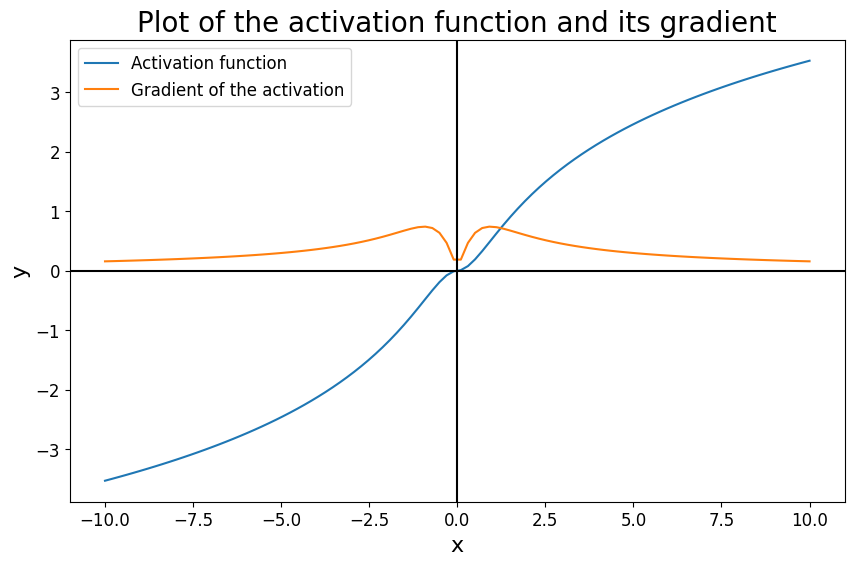

In [ ]:
#Plots of activation function and gradient.
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-10,10,100), cw1_activation(np.linspace(-10,10,100)), label='Activation function')
plt.plot(np.linspace(-10,10,100),grad_cw1_activation(np.linspace(-10,10,100)), label='Gradient of the activation')
plt.title('Plot of the activation function and its gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axhline(0,color = 'black')
plt.axvline(0, color= 'black')
plt.show()
plt.close()

I include the activation function and its gradient in our lookup tables, to use later for error backpropagation during training.

In [ ]:
# A lookup table for activation functions by their names.
activation_table = {
    "cw1": cw1_activation,
    # Identity function.
    "identity": lambda x: x
}

# A lookup table for gradient of activation functions by their names.
grad_activation_table = {
    "cw1": grad_cw1_activation,
    # Identity function gradient.
    "identity": lambda x: np.ones_like(x)
}

<a name="task-121"></a>

### (1.2.1) [(index)](#index-task-121)

Next I build the network architecture, with an input layer, 2 hidden layers (with 50 neurons each), and an output layer with one neuron (the outcome variable capacitance). Using standard minibatch SGD, I train the MLP on the training set using mini-batches of 8 data points for 300 epochs [NB: we set the learning rate to (mini-batch size $\times 5\times10^{-5}$), because the MLP implementation available to students in 2024 used, in mini-batch stochastic gradient descent, the sum over the mini-batch of per-sample losses instead of the mean loss]. I use the Glorot initialisation of weights are used, as recommended in the notebook.

In [ ]:
mlp = MLP(seed=2)
mlp.add_layer(X_train.shape[1], 50)
mlp.add_layer(50, 50, "cw1")
mlp.add_layer(50, 1, "cw1")
print("Number of layers:",mlp.n_layers())
print("Number of trainable parameters:", mlp.n_parameters())

n_epochs = 300
mlp, losses_train, losses_test = sgd(X_train_std, y_train, X_test_std, y_test,
                                     mlp, learning_rate = 8*5e-5,
                                     n_epochs=n_epochs,
                                     minibatchsize=8)
y_hat_train, _ = mlp.predict(X_train_std)
y_hat_test, _ = mlp.predict(X_test_std)
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

Number of layers: 3
Number of trainable parameters: 3251


  0%|          | 0/300 [00:00<?, ?it/s]

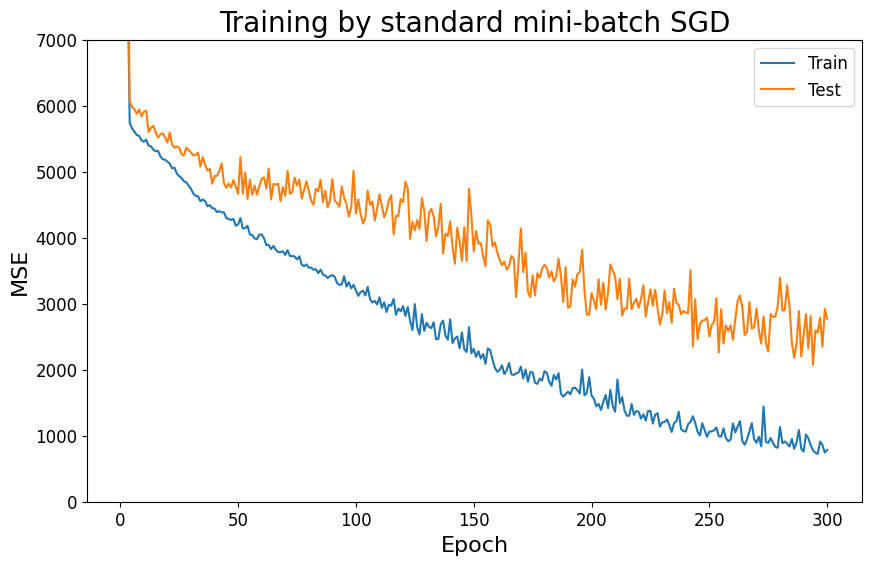

In [ ]:
# plot training progress
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1,n_epochs+1),losses_train, label="Train")
ax.plot(np.arange(1,n_epochs+1),losses_test, label="Test")
ax.set(title="Training by standard mini-batch SGD", xlabel = "Epoch", ylabel = "MSE", ylim=(0,7000))
ax.legend()
plt.show()

After training with standard mini-batch SGD for 300 epochs, the MLP achieves a train MSE of 784.64 and train $R^2$ score of 0.88, indicating a good performance on the training data. However, a significantly increased test MSE of 2768.36 and $R^2$ score of 0.58 indicates that the model does not generalise well on the test dataset, suggesting overfitting is an issue to tackle.

<a name="task-122"></a>

### (1.2.2) [(index)](#index-task-121)

Next I implement SGD with momentum, that is, at each iteration one defines an equation for a velocity that is then used to update the parameters:
$$
\mathbf{v}_{t+1} = \beta \mathbf{v}_t + \eta \nabla_{\theta} L(\theta_t; S_m)\\
\theta_{t+1} = \theta_t - \mathbf{v}_{t+1},
$$
where $S_m$ stands for the minibatch under consideration, $L$ is the loss function (here, the $MSE$) and $\beta$ controls the memory accumulated by the gradient to accelerate convergence. Implementing SGD with momentum requires me to modify the code from the `sgd_step` function developed in class.

In [ ]:
def momentum_step(X, y, mlp, velocities,learning_rate = 1e-3, beta = 0.9):
    """
    Apply a stochastic gradient descent step with momentum using the sampled batch.

    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        velocities (List[Dict[str, np.ndarray]]): Velocities from previous momentum step.
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
        beta (float): The momentum term to accelerate convergence of SGD.

    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
        updated_velocities (List[Dict[str, np.ndarray]]): The updated velocities after applying SGD with momentum.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_mse_loss(y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # Compute updated velocities
    updated_layers = []
    updated_velocities = []
    for layer, grad, v in zip(mlp.layers, gradients, velocities):
        layer = layer.copy()
        # define the velocity for weights
        v_W = beta * v["W"] + learning_rate * grad["W"]
        # use the velocity to update weights
        layer["W"] = layer["W"] - v_W
        # define the velocity for the bias
        v_b = beta * v["b"] + learning_rate * grad["b"]
        # use the velocity to update the bias
        layer["b"] = layer["b"] - v_b
        updated_layers.append(layer)
        updated_velocities.append({"W": v_W, "b": v_b})

    return updated_layers, updated_velocities


Next I define a new `sgd_momentum` function that will take the additional parameter $\beta$ for the momentum term.

In [ ]:
def sgd_momentum(X_train, y_train, X_test, y_test, mlp,
                 learning_rate = 1e-3, beta = 0.9,
                n_epochs=10, minibatchsize=1, seed=42):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        beta (float): The momentum term to accelerate convergence of SGD.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        # velocities for SGD with momentum are zero at the beginning
        velocities = []
        for layer in mlp.layers:
            velocities.append({"W": np.zeros_like(layer["W"]),
                               "b": np.zeros_like(layer["b"])})

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step with momentum
            updated_layers, updated_velocities = momentum_step(X_batch, y_batch, mlp,
                                                               velocities=velocities,
                                                               learning_rate=learning_rate,
                                                               beta=beta)

            # update weights and biases of MLP
            mlp.layers = updated_layers

            # update velocities
            velocities = updated_velocities

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(mse_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(mse_loss(y_test, y_hat_test).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.2f} '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.2f} ')
    return mlp, losses_train, losses_test

I can now train the MLP like before, using SGD with momentum and setting the momentum parameter $\beta=0.4$.

In [ ]:
mlp = MLP(seed=2)
mlp.add_layer(X_train.shape[1], 50)
mlp.add_layer(50, 50, "cw1")
mlp.add_layer(50, 1, "cw1")
print("Number of layers:",mlp.n_layers())
print("Number of trainable parameters:", mlp.n_parameters())

n_epochs = 300
mlp, momentum_losses_train, momentum_losses_test = sgd_momentum(X_train_std, y_train, X_test_std,
                                              y_test, mlp, learning_rate = 8*5e-5,
                                              beta = 0.4,
                                              n_epochs=n_epochs,
                                              minibatchsize=8)

y_hat_train, _ = mlp.predict(X_train_std)
y_hat_test, _ = mlp.predict(X_test_std)
momentum_r2_train = r2_score(y_train, y_hat_train)
momentum_r2_test = r2_score(y_test, y_hat_test)

Number of layers: 3
Number of trainable parameters: 3251


  0%|          | 0/300 [00:00<?, ?it/s]

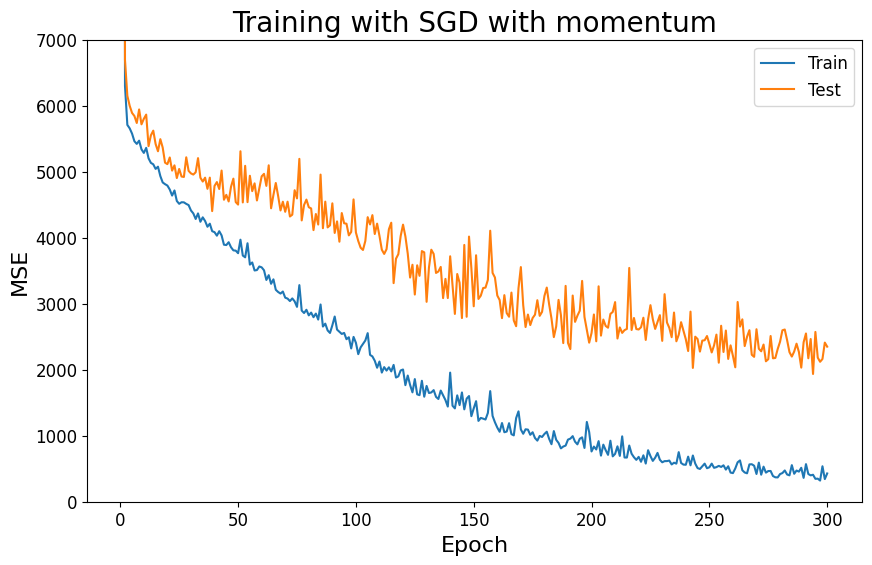

In [ ]:
# plot training progress
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1,n_epochs+1),momentum_losses_train, label="Train")
ax.plot(np.arange(1,n_epochs+1),momentum_losses_test, label="Test")
ax.set(title="Training with SGD with momentum", xlabel = "Epoch", ylabel = "MSE", ylim=(0,7000))
ax.legend()
plt.show()

We observe that the MLP trained with SGD using momentum leads to a model with higher test $R^2$ score (0.64) than the previous model trained with standard mini-batch SGD (test set $R^2$ score = 0.58). This higher test score is achieved by a faster convergence of the training losses as illustrated next.

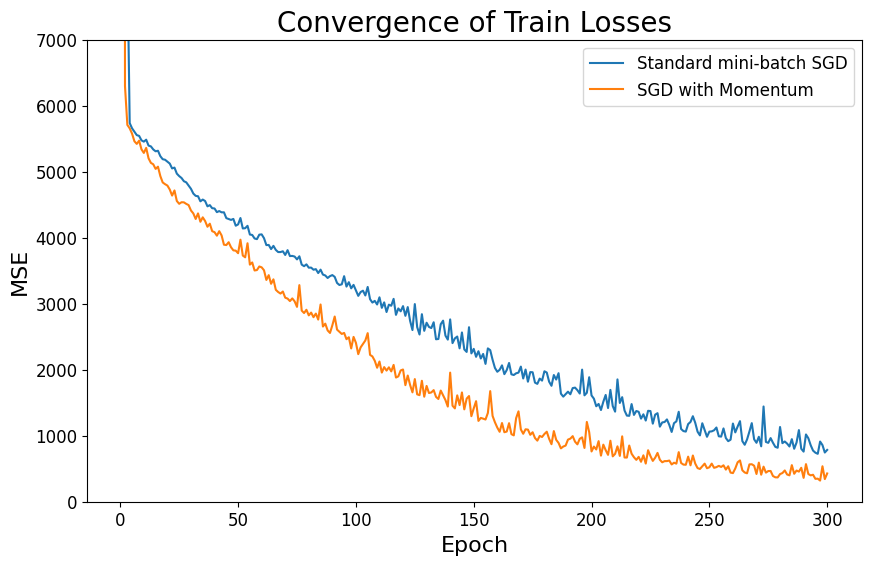

In [ ]:
# plot training progress
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1,n_epochs+1),losses_train, label="Standard mini-batch SGD")
ax.plot(np.arange(1,n_epochs+1),momentum_losses_train, label="SGD with Momentum")
ax.set(title = "Convergence of Train Losses", xlabel = "Epoch", ylabel = "MSE", ylim=(0,7000))
ax.legend()
plt.show()

One sees that train loss for SGD with momentum converges faster, illustrating that momentum indeed accelerates convergence, because it tends to get stuck in local minima less than standard mini-batch SGD.

Here a table comparing test and train MSE losses and $R^2$ scores between the MLP with standard mini-batch SGD, SGD with momentum and the random forest model from task **1.1.2**:

In [ ]:
table =pd.DataFrame([
    ('R^2 score', 'MLP (standard mini-batch SGD)',  r2_train, r2_test),
    ('MSE', 'MLP (standard mini-batch SGD)', losses_train[-1], losses_test[-1]),

    ('R^2 score', 'MLP (SGD with Momentum)',  momentum_r2_train, momentum_r2_test),
    ('MSE', 'MLP (SGD with Momentum)', momentum_losses_train[-1], momentum_losses_test[-1]),

    ('R^2 score', 'Random Forest',  rf_r2_score(optimalB_rf_model, X_train, y_train), rf_r2_score(optimalB_rf_model, X_test, y_test)),
    ('MSE', 'Random Forest',  rf_mse(optimalB_rf_model, X_train, y_train), rf_mse(optimalB_rf_model, X_test, y_test)),
], columns=['Metric', 'Model', 'On training set', 'On test set'])

table

,Metric,Model,On training set,On test set
0,R^2 score,MLP (standard mini-batch SGD),0.881604,0.580684
1,MSE,MLP (standard mini-batch SGD),784.6431269191047,2768.362719282651
2,R^2 score,MLP (SGD with Momentum),0.935366,0.644126
3,MSE,MLP (SGD with Momentum),428.34627724954544,2349.512331459814
4,R^2 score,Random Forest,0.784422,0.466303
5,MSE,Random Forest,1428.694926,3523.516012


MLP with SGD with momentum, other than converging faster that standard minibatch SGD, attains also a lower training MSE loss in the final epoch (428.35 vs 784.64). On the test set, it also performs better, albeit only moderately better (with a test $R^2$ score of 0.64 against 0.58 of MLP with standard minibatch SGD), hence it does not improve significantly over MLP with standard SGD in terms of generalisation power. In this regard, they both improve over the random forest, which had a test $R^2$ score of 0.47.

<a name="task-123b"></a>

### (1.2.3, BSc students only) [(index)](#index-task-123b)

Here I compare the MLP to linear regression with quadratic basis functions. I start with extending the set of features for train and test data with quadratic basis functions.

In [ ]:
def extend_quadratic(X):
    """Extend set of features by quadratic basis functions.

    Parameters:
        X (np.ndarray): N data points with p features each.

    Returns:
        X_ext (np.ndarray): N data points with p features extended by p^2
            quadratic features.
    """

    X_ext = X.copy()

    # iterate through all features
    for i, x in enumerate(X.T):
        # extend X_ext by product of features
        for y in X.T[i:]:
            X_ext = np.hstack([X_ext, (x * y)[:, None]])

    return X_ext

In [ ]:
# extend quadtratic features for train and test data
X_train_ext = extend_quadratic(X_train)
X_test_ext = extend_quadratic(X_test)

To keep the analysis consistent with the MLP, also for comparison, I standardise the features also in this case.

In [ ]:
X_test_ext_std = standardise(X_test_ext, X_train_= X_train_ext)
X_train_ext_std = standardise(X_train_ext)

Next I implement Ridge linear regression on this extended set of features, relying on the implementation of Ridge regression developed in class to compute the distribution of coefficients for three different values of $\lambda$ given by 0.0001, 1 and 1000.

In [ ]:
## function for Ridge estimate from the available notebook
def ridge_estimate(X, y, penalty):

    # X: N x p matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters ((p + 1) x 1)

    # check X and y have the same length
    assert X.shape[0] == y.shape[0], "Input X and y have different lengths."

    N, p = X.shape
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (p + 1)
    N_aug, p_aug = X_aug.shape
    I = np.identity(p_aug)
    I[0] = 0.0 # penalty excludes the bias term.
    beta_ridge = np.linalg.solve(X_aug.T @ X_aug + penalty * I, X_aug.T @ y)

    return beta_ridge

In [ ]:
# define set of lambda
lambdas = [0.0001,1,1000]

# initialise list of coeffcients
betas_lambdas = []

# apply Ridge regression for each lambda
for l in lambdas:
    betas_lambdas.append(ridge_estimate(X_train_ext_std, y_train, l))

I plot the coeffcients for different values of $\lambda$, excluding the intercept which is not affected by the penalisation in Ridge regression.

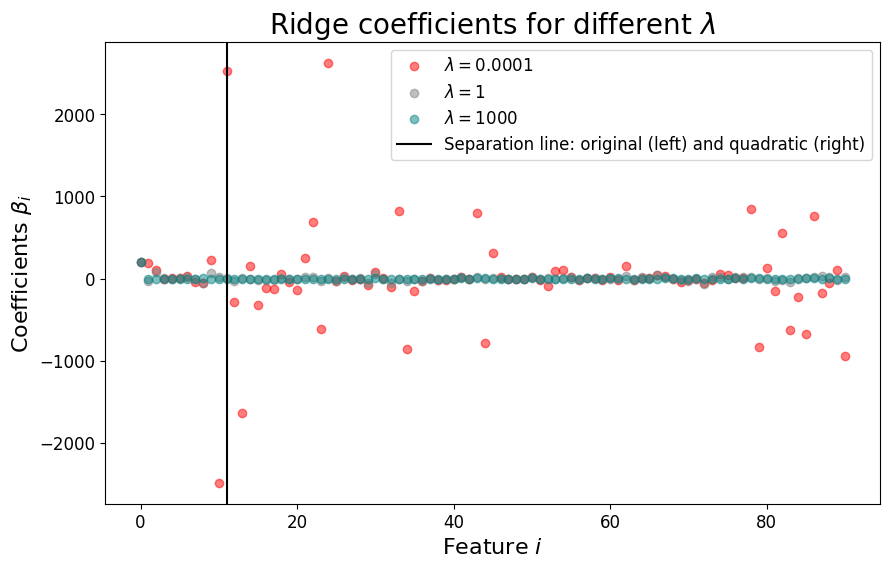

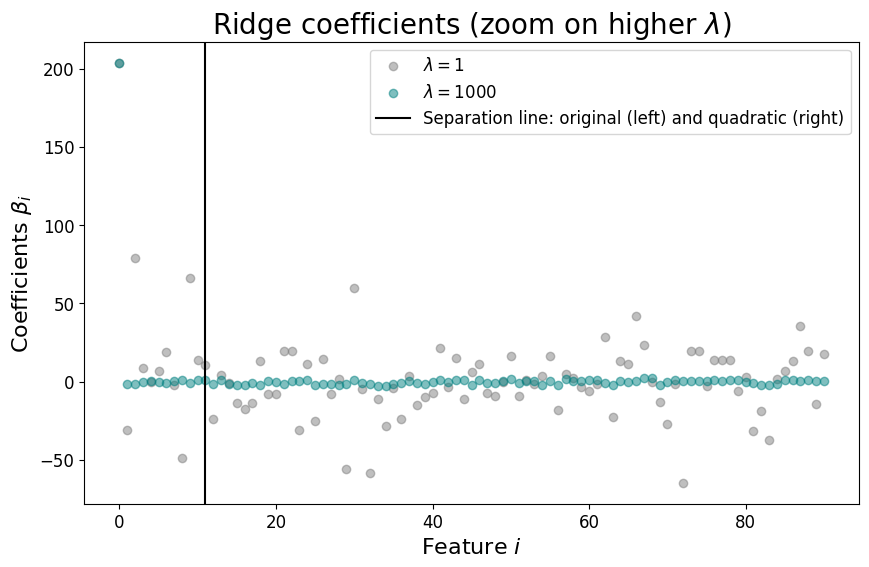

In [ ]:
# plot coefficients for different lambdas
coefficient_index = np.arange(X_train_ext_std.shape[1]+1)
colors=['red', 'gray', 'teal']

fig, ax = plt.subplots(figsize=(10, 6))

for i, l in enumerate(lambdas):
    ax.scatter(coefficient_index, betas_lambdas[i],alpha=0.5,label=f"$\lambda=${l}", c = colors[i])

ax.axvline(x=11, color="black", label="Separation line: original (left) and quadratic (right)")

ax.set(xlabel=r"Feature $i$", ylabel=r"Coefficients $\beta_i$", title=r"Ridge coefficients for different $\lambda$")
ax.legend()

plt.show()


fig, ax = plt.subplots(figsize=(10, 6))

for i, l in enumerate(lambdas[1:]):
    ax.scatter(coefficient_index, betas_lambdas[1+i],alpha=0.5,label=f"$\lambda=${l}", c = colors[1+i])

ax.axvline(x=11, color="black", label="Separation line: original (left) and quadratic (right)")

ax.set(xlabel=r"Feature $i$", ylabel=r"Coefficients $\beta_i$", title=r"Ridge coefficients (zoom on higher $\lambda$)")
ax.legend()

plt.show()

From this plot, one sees that the coefficients $\beta_i$ get smaller when $\lambda$ increases, because the penalty for large coefficients is more strongly enforced, inducing a higher level of sparsity - this is clear from the different scale of the two plots. The coefficients eventually get close to zero for $\lambda=1000$, with the exception of the intercept term that is not regularised.

For both $\lambda=0.0001$ and $\lambda=1$ there are a few large coefficients distributed across the original and quadratic features, highlighting that the regression model leverages also the quadratic features for prediction hinting towards their importance.

Next I implement a function to make predictions with Ridge regression and a function to implement cross-validation that includes this function.

In [ ]:
def predict_linear_regression(X, beta):
    """Predict with linear regression.
    Parameters:
        X: samples for which to evaluate the prediction, of shape (N, p)
        beta: vector of learnt coefficients, of shape (p+1, 1)

    Returns:
        y: predicted outcome variables, of shape (N, 1)
    """

    # augment X by 1
    N = X.shape[0]
    X_aug = np.hstack([np.ones((N,1)), X])

    # predict according to linear regression
    y = X_aug @ beta
    return y

def ridge_cv_score(X_train, y_train, folds, lambdas):
    """
    Performs cross-validation of Ridge regression for a set of penalty values
    Args:
        X_train: training samples, of shape (N, p).
        y_train: vector of outcome variables, of shape (N,).
        folds: list of folds with their indices.
        lambdas: set of Ridge penalties to scan.
    Returns:
        Fold-averaged MSE.
    """
    scores = np.zeros((len(folds),len(lambdas)))
    for i in range(len(folds)):

        # split into train and validation
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]

        # We standardise within the cross-validation to treat the validation sets effectively as test sets
        X_val_i_std = standardise(X_val_i, X_train_=X_train_i)
        X_train_i_std = standardise(X_train_i)

        # iterate through lambas
        for j, l in enumerate(lambdas):

            # compute Ridge coefficients
            beta = ridge_estimate(X_train_i_std, y_train_i, l)

            # compute Ridge prediction
            y_val_pred =  predict_linear_regression(X_val_i_std,beta)

            # compute MSE
            scores[i,j] = mse_loss(y_val_i,y_val_pred)[0]

    # Return average MSE across folds
    return scores.mean(axis=0)

Next I implement 5-fold cross-validation, starting by creating the 5 folds on the training set, then scanning over different values of $\lambda$ to find the optimal value of $\lambda$ for Ridge applied to extended and non extended features.

In [ ]:
# shuffling the rows of training data
perm_ind = rng.permutation(len(y_train))

X_train_ext_perm = X_train_ext[perm_ind]

X_train_perm = X_train[perm_ind]
y_train_perm = y_train[perm_ind]

# Now we have a list of five index arrays, each correspond to one of the five folds.
n_per_split = int(len(y_train)/5)
folds_indexes = np.split(np.arange(len(y_train)), [n_per_split,2*n_per_split,3*n_per_split,4*n_per_split])

In [ ]:
# define range of lambdas in log-scale
lambdas = np.logspace(-4,10,2000)

# apply Ridge CV to extended features
scores_ridge_ext = ridge_cv_score(X_train_ext_perm,y_train_perm,folds_indexes,lambdas)

best_l_ext = lambdas[np.argmin(scores_ridge_ext)]

print("Best lambda for Ridge on quadratic features:", round(best_l_ext,3))

Best lambda for Ridge on quadratic features: 94.186


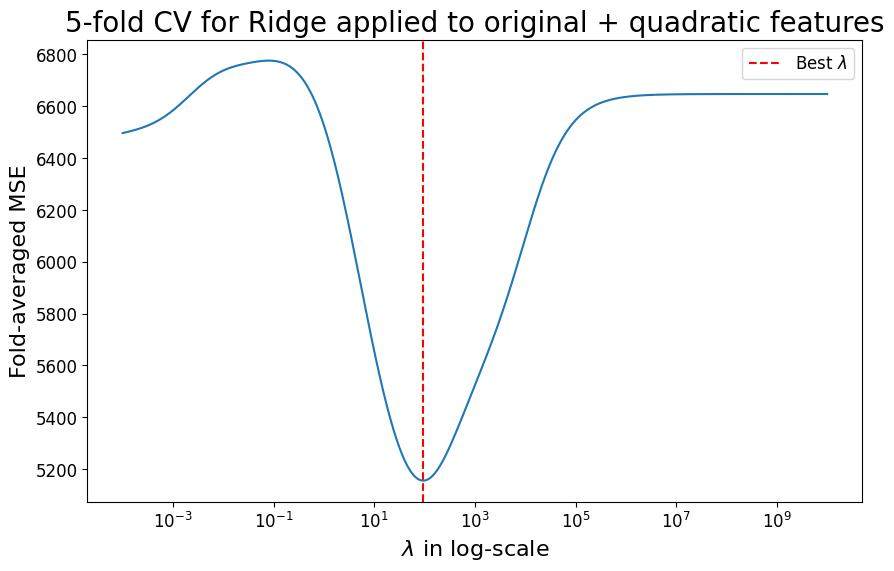

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(lambdas,scores_ridge_ext)
ax.axvline(x=best_l_ext,ls="--",label="Best $\lambda$",c="red")
ax.set(xscale="log",xlabel=r"$\lambda$ in log-scale", ylabel="Fold-averaged MSE",title="5-fold CV for Ridge applied to original + quadratic features")

ax.legend()

plt.show()

It is not a surprise that the optimal $\lambda$ is quite large, since the added features (quadratic) are correlated among them and they are correlated to the original features.

Having set the optimal $\lambda$, I re-train the model and evaluate the performance of the optimal Ridge model with quadratic features on both train and test data.

In [ ]:
best_beta_ext = ridge_estimate(X_train_ext_std, y_train, best_l_ext)

def print_evaluation_ridge(X_train, y_train, X_test, y_test, l, beta):
    """
    Evaluate performance of Ridge regression model on training and test data.
    Args:
        X_train: training samples, of shape (N, p).
        y_train: vector of outcome variables, of shape (N,).
        X_test: training samples, of shape (N^test, p).
        y_test: vector of outcome variables, of shape (N^test,).
        l: Ridge penalty.
        beta: vector of learnt coefficients, of shape (p+1, 1)
    Returns:
        Table of MSE and R^2 score on training and test set.
    """

    # compute train and test predictions, then MSE and R^2 score for both
    y_pred = predict_linear_regression(X_train,beta)
    # compute MSE
    mse_train = mse_loss(y_train,y_pred)[0]
    # compute R2
    r2_train = r2_score(y_train,y_pred)

    y_pred = predict_linear_regression(X_test,beta)
    # compute MSE
    mse_test = mse_loss(y_test,y_pred)[0]
    # compute R2
    r2_test = r2_score(y_test,y_pred)


    table = pd.DataFrame([[mse_train,r2_train],[mse_test,r2_test]],columns=["MSE","R2"],index=["Train","Test"])
    display(table)

    return table

summary_ridge_ext = print_evaluation_ridge(X_train_ext_std,y_train,X_test_ext_std,y_test,best_l_ext,best_beta_ext)

,MSE,R2
Train,4672.105314,0.295018
Test,5363.782624,0.187564


For comparison, I perform 5-fold cross validation to find the best $\lambda$ for Ridge applied to the original features.

In [ ]:
# apply Ridge CV to basic features
scores_ridge = ridge_cv_score(X_train_perm, y_train_perm, folds_indexes,lambdas)

best_l = lambdas[np.argmin(scores_ridge)]

print("Best lambda for Ridge on basic features:", round(best_l,3))

Best lambda for Ridge on basic features: 76.373


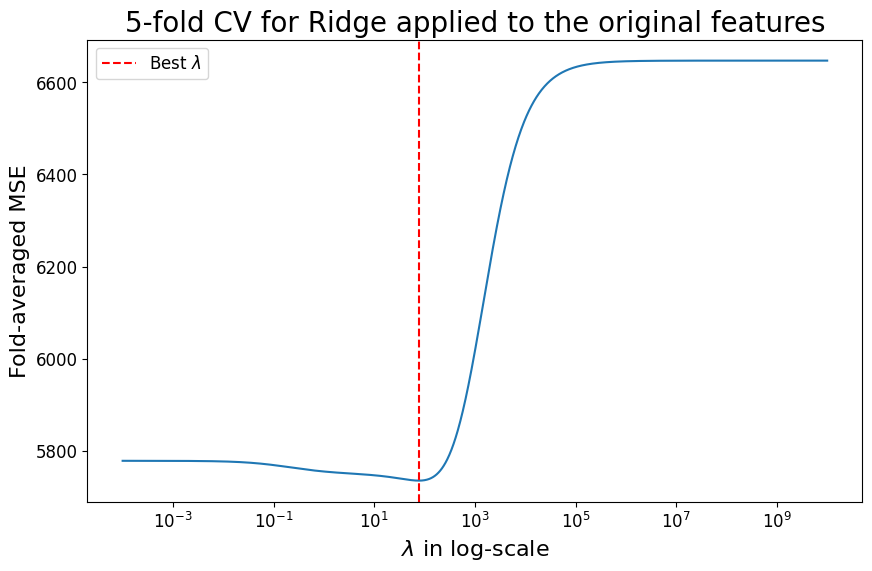

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(lambdas,scores_ridge)
ax.axvline(x=best_l,ls="--",label="Best $\lambda$",c="red")
ax.set(xscale="log",xlabel=r"$\lambda$ in log-scale", ylabel="Fold-averaged MSE",title="5-fold CV for Ridge applied to the original features")
ax.legend()

plt.show()

In [ ]:
# linear regression on original features with optimal lambda

best_beta = ridge_estimate(X_train_std, y_train, best_l)
summary_ridge = print_evaluation_ridge(X_train_std,y_train,X_test_std,y_test,best_l, best_beta)

,MSE,R2
Train,5566.423970,0.160073
Test,5849.358932,0.114015


Finally I evaluate the performance of standard linear regression (i.e. $\lambda=0$) on the original features.

In [ ]:
best_beta0 = ridge_estimate(X_train_std, y_train, 0)

summary_lr = print_evaluation_ridge(X_train_std,y_train,X_test_std,y_test,0, best_beta0)

,MSE,R2
Train,5555.809805,0.161674
Test,5794.722719,0.122290


I summarise our results in two figures, one for MSE and one for the $R^2$ score.

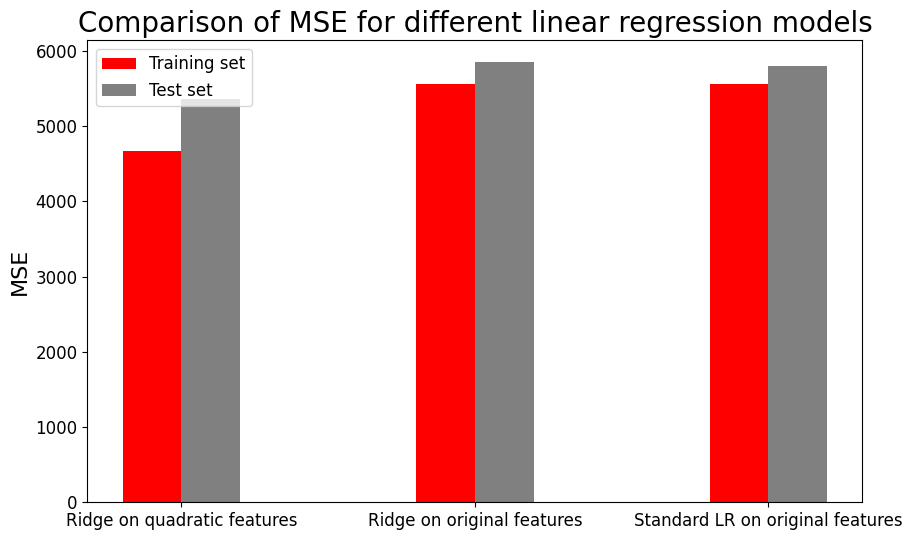

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

xticks = np.arange(3)
xlabels = ["Ridge on quadratic features","Ridge on original features", "Standard LR on original features"]

ax.bar(xticks[0]-0.1,summary_ridge_ext["MSE"]["Train"],width=0.2, label='Training set', color='red')
ax.bar(xticks[0]+0.1,summary_ridge_ext["MSE"]["Test"],width=0.2, label='Test set', color='gray')
ax.bar(xticks[1:]-0.1,[summary_ridge["MSE"]["Train"],summary_lr["MSE"]["Train"]],width=0.2, color='red')
ax.bar(xticks[1:]+0.1,[summary_ridge["MSE"]["Test"],summary_lr["MSE"]["Test"]],width=0.2, color='gray')

ax.set(xticks=xticks,xticklabels=xlabels,ylabel="MSE",title="Comparison of MSE for different linear regression models")

ax.legend()

plt.show()


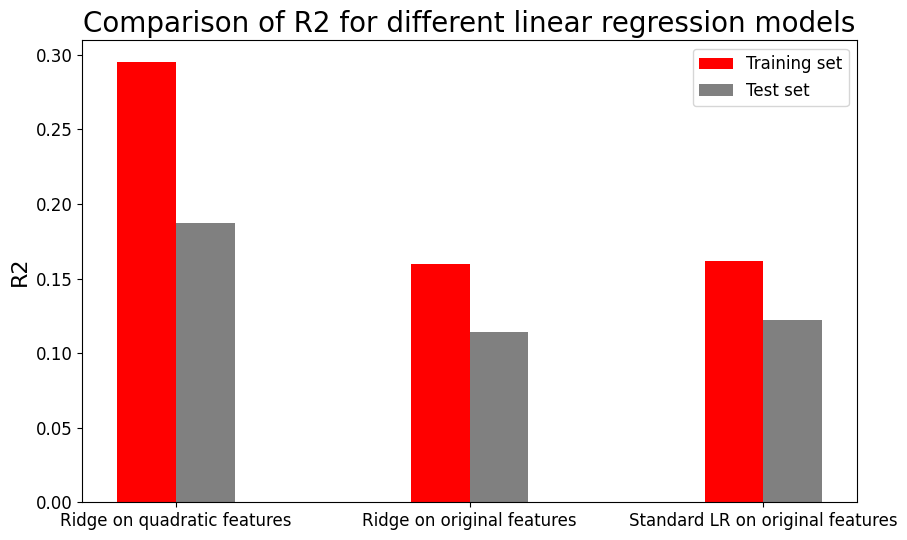

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

xticks = np.arange(3)
xlabels = ["Ridge on quadratic features","Ridge on original features", "Standard LR on original features"]

ax.bar(xticks[0]-0.1,summary_ridge_ext["R2"]["Train"],width=0.2, label='Training set', color='red')
ax.bar(xticks[0]+0.1,summary_ridge_ext["R2"]["Test"],width=0.2, label='Test set', color='gray')
ax.bar(xticks[1:]-0.1,[summary_ridge["R2"]["Train"],summary_lr["R2"]["Train"]],width=0.2, color='red')
ax.bar(xticks[1:]+0.1,[summary_ridge["R2"]["Test"],summary_lr["R2"]["Test"]],width=0.2, color='gray')

ax.set(xticks=xticks,xticklabels=xlabels,ylabel="R2",title="Comparison of R2 for different linear regression models")
ax.legend()
plt.show()

Ridge regression on the original and quadratic features has higher performance than the other two approaches (Ridge linear regression and standard linear regression) that implement linear regression on the original features alone, with an $R^2$ score on the test set of 0.19 vs 0.11 (Ridge regression on original features) and 0.12 (standard linear regression on original features), highlighting that including non-linearities in the regression is important. However, one sees possible overfitting occurring with the quadratic features, with a larger difference in performance between training and test set than in the other two approaches.

The performance, however, remains very modest compared to the one achieved by the MLP (test $R^2$ score of up to 0.64, see **1.2.2**), indicating that non-linear relationships more complex than pairwise products need to be accounted for in order to achieve generalisability.

<a name="task-123m"></a>

### (1.2.3, MSc/4th-year students only) [(index)](#index-task-123m)

In this section, I implement Nesterov’s Accelerated Gradient (NAG) as described in Section 3 of the article by Sutskever et al. (2015).


In NAG, the training update rule is a modification of SGD with momentum seen above:
\begin{align*}
\mathbf{v}_{t+1} =& \mu_t \mathbf{v}_t + \eta\nabla_\theta L(\theta_t - \mu_t\mathbf{v}_t; S_m)\\
\theta_{t+1} =& \theta_t - \mathbf{v}_{t+1}
\end{align*}
where the momentum parameter has been here called $\mu_t$. In the paper, NAG was implemented in conjunction with a schedule for $\mu_t$:
\begin{align*}
\mu_t = \min(1-2^{-1-\log_2(\lfloor t/250 \rfloor + 1)},\mu_{\text{max}}),
\end{align*}
where $\mu_{\text{max}}$ was chosen from $\{0.999,0.995,0.99,0.9,0\}$, and a random parameter initialisation called sparse initialisation (SI).

In SI, each neuron is initally connected to 15 of the random neurons in the previous layer, whose weights are drawn from a Gaussian distribution with zero mean and unit variance. The biases are initialised to zero. I write the following function to implement SI.

In [ ]:
def random_initialization(mlp):

    for layer in mlp.layers:

        out_dim, in_dim = layer["W"].shape

        # weights are sampled from unit Normal
        W = mlp.rng.normal(size=(out_dim, in_dim))
        # only keep 15 random neighbours
        Z = []
        for i in range(out_dim):
            z = np.zeros(in_dim)
            z[mlp.rng.choice(in_dim, size=min(in_dim,15), replace=False)] = 1
            Z.append(z)
        W *= np.asarray(Z)

        layer["W"] = W

    return mlp

Implementing NAG requires to modify the implementation for the SGD step to account for the NAG update rule (see above).

In [ ]:
def nesterov_step(X, y, mlp, velocities, learning_rate = 1e-3, mu = 0.9):
    """
    Apply a stochastic gradient descent step with momentum using the sampled batch.

    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, D).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        velocities (List[Dict[str, np.ndarray]]):
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
        mu (float): The momentum term to accelerate convergence of SGD, called mu instead of beta by Sutskever et al.

    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
        updated_velocities (List[Dict[str, np.ndarray]]): The updated velocities after applying Nesterov momentum.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_mse_loss(y, y_hat)


    # Shift parameters according to Nesterov velocities
    shifted_layers = []
    for layer, v in zip(mlp.layers, velocities):
        shifted_layer = layer.copy()
        shifted_layer["W"] += v["W"]
        shifted_layer["b"] += v["b"]
        shifted_layers.append(shifted_layer)


    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(shifted_layers, forward_pass, delta_output)

    # Compute updated velocities
    updated_layers = []
    updated_velocities = []
    for layer, grad, v in zip(mlp.layers, gradients, velocities):
        layer = layer.copy()
        v_W = mu * v["W"] - learning_rate * grad["W"]
        layer["W"] = layer["W"] + v_W
        v_b = mu * v["b"] - learning_rate * grad["b"]
        layer["b"] = layer["b"] + v_b
        updated_layers.append(layer)
        updated_velocities.append({"W": v_W, "b": v_b})

    return updated_layers, updated_velocities


Next in the implementation of SGD, I introduce the schedule for $\mu_t$.

In [ ]:
def sgd_nesterov(X_train, y_train, X_test, y_test, mlp,
                 learning_rate = 1e-3, mu_max = 0.9,
                n_epochs=10, minibatchsize=1, seed=42):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        mu_max (float): Maximum momentum mu in the schedule of mu presented by Sutskever et al.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    epochs_bar = tqdm(range(n_epochs))

    # count total number of iterations for scheduled mu
    t = 0

    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        # velocities for SGD with momentum are zero at the beginning
        velocities = []
        for layer in mlp.layers:
            velocities.append({"W": np.zeros_like(layer["W"]),
                               "b": np.zeros_like(layer["b"])})

        for j in range(n_iterations):

            # compute scheduled mu_t
            mu_t = min(1-2**(-1-np.log2(np.floor(t/250)+1)),mu_max)

            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step with nesterov momentum
            updated_layers, updated_velocities = nesterov_step(X_batch, y_batch, mlp,
                                                               velocities=velocities,
                                                               learning_rate=learning_rate,
                                                               mu=mu_t)

            # update weights and biases of MLP
            mlp.layers = updated_layers

            # update velocities
            velocities = updated_velocities

            # update count of iterations
            t += 1

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(mse_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(mse_loss(y_test, y_hat_test).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.2f}, '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.2f}, '
                                   f'mu_t: {(mu_t):.3f}')
    return mlp, losses_train, losses_test

I now focus on the 5 different values for $\mu_\max \in \{0.999, 0.995, 0.99, 0.9, 0\}$ that were used in the paper.

In [ ]:
# set of mu_max values considerd
mu_max_values = [0.999, 0.995, 0.99, 0.9, 0]

# initialise train and test losses for experiment
nesterov_losses_train_all = np.zeros((len(mu_max_values),n_epochs))
nesterov_losses_test_all = np.zeros((len(mu_max_values),n_epochs))

# iterate through different values of mu_max
for i, mu_max in enumerate(mu_max_values):

    print(f"Train MLP with Nesterov using mu_max={mu_max}")

    mlp = MLP(seed=2)
    mlp.add_layer(X_train.shape[1], 50)
    mlp.add_layer(50, 50, "cw1")
    mlp.add_layer(50, 1, "cw1")
    # apply random initialisation
    mlp = random_initialization(mlp)
    # train with Nesterov momentum
    mlp, nesterov_losses_train, nesterov_losses_test = sgd_nesterov(X_train_std, y_train, X_test_std,
                                                y_test, mlp,
                                                learning_rate = 8*5e-6,
                                                mu_max=mu_max,
                                                n_epochs=n_epochs,
                                                minibatchsize=8)
    # store train and test losses
    nesterov_losses_train_all[i] = nesterov_losses_train
    nesterov_losses_test_all[i] = nesterov_losses_test

Train MLP with Nesterov using mu_max=0.999


  0%|          | 0/300 [00:00<?, ?it/s]

Train MLP with Nesterov using mu_max=0.995


  0%|          | 0/300 [00:00<?, ?it/s]

Train MLP with Nesterov using mu_max=0.99


  0%|          | 0/300 [00:00<?, ?it/s]

Train MLP with Nesterov using mu_max=0.9


  0%|          | 0/300 [00:00<?, ?it/s]

Train MLP with Nesterov using mu_max=0


  0%|          | 0/300 [00:00<?, ?it/s]

I plot the training loss for SGD with Nesterov for varying values of $\mu_\max$ and compare it to standard mini-batch SGD and SGD with Momentum.

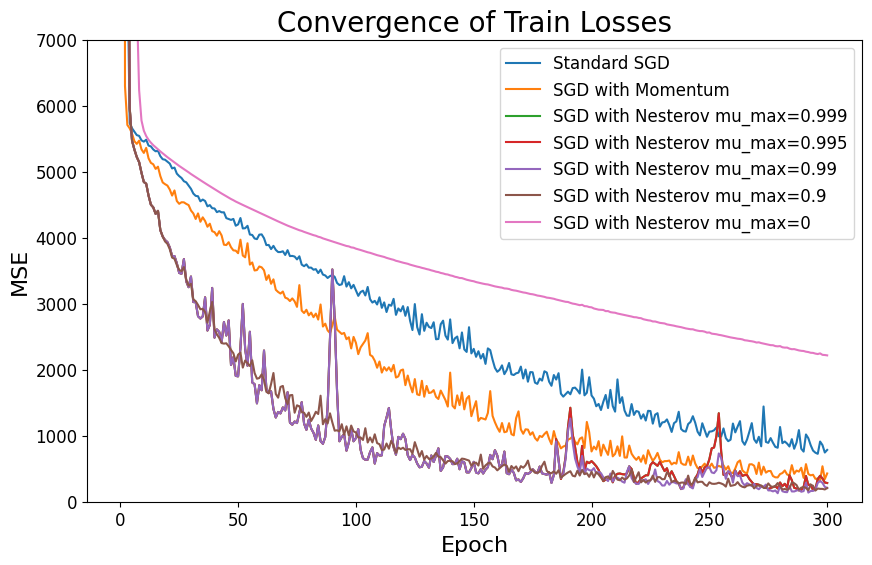

In [ ]:
# plot training progress for different MLPs
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1,n_epochs+1),losses_train, label="Standard SGD")
ax.plot(np.arange(1,n_epochs+1),momentum_losses_train, label="SGD with Momentum")
# iterate through different values of mu_max and plot traning progress with Nesterov
for i, mu_max in enumerate(mu_max_values):
    ax.plot(np.arange(1,n_epochs+1),nesterov_losses_train_all[i], label=f"SGD with Nesterov mu_max={mu_max}")
ax.set(title="Convergence of Train Losses", xlabel = "Epoch", ylabel = "MSE", ylim=(0,7000))
ax.legend()
plt.show()

Across values of $\mu_\max>0$, we can observe that the training losses of the MLP trained with Nesterov momentum converge much faster than standard mini-batch SGD or SGD with Momentum. This illustrates the capactiy of Nesterov momentum to further accelerate training my "looking ahead", preventing it from gettin stuck in local minima.
NAG with values of $\mu_\max>0$ all converge to training MSE losses about 200-300 after 300 epochs, which are lower than the standard mini-batch SGD and SGD with momentum training losses, hence showing better fitting power on the training set.

For $\mu_{\max} = 0$, convergence is slower and also less effective, reaching a training loss of 2217.47, up to 10 times higher than other versions of NAG and SGD.